# Leanding Case Study

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

-  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company



The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

Here, our targer variable will be '***loan_status***'



## Importing Libraries

In [ ]:
# libraries used for solving the problem statement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

# filtering the warnings
import warnings
warnings.filterwarnings(action="ignore")

# config for displaying al row and columns in pandas dataframe and series
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading Data

In [ ]:
# reading the data from the desired location
data = pd.read_csv("./loan.csv")
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Data Wrangling

In [ ]:
# shape of the data
print("Shape:", data.shape)
# The raw data has: 39717 rows and 111 columns

Shape: (39717, 111)


In [ ]:
# null count and dtype info of the data
data.info(verbose=True, show_counts=True)
# There are features (columns) having 0 non-null counts or say completely null


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [ ]:
# percentage of null values on each column
null_count_info = round(data.isna().mean()*100)
null_count_info

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [ ]:
# count of unique values for each column
unique_count_info = data.nunique()
unique_count_info

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26526
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [ ]:
# percentage of unique values for each column
unique_count_percent = round((unique_count_info/data.shape[0])*100)
unique_count_percent
# There are columns having 100% unique columns

id                                100.0
member_id                         100.0
loan_amnt                           2.0
funded_amnt                         3.0
funded_amnt_inv                    21.0
term                                0.0
int_rate                            1.0
installment                        39.0
grade                               0.0
sub_grade                           0.0
emp_title                          73.0
emp_length                          0.0
home_ownership                      0.0
annual_inc                         13.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                               100.0
desc                               67.0
purpose                             0.0
title                              49.0
zip_code                            2.0
addr_state                          0.0
dti                                 7.0


## Data Cleaning

Columns such as:
- Columns having >50% of data null
- Columns having 100% unique values
- Columns having only 1 unique value or say constant columns
- Columns which won't contribute much on analysis

In [ ]:
# selecting and removing the the columns having >50% of the values as null
null_columns = null_count_info[null_count_info >= 50].index.values
print("Removed Columns:", null_columns)
data.drop(columns=null_columns, inplace=True)

Removed Columns: ['mths_since_last_delinq' 'mths_since_last_record' 'next_pymnt_d'
 'mths_since_last_major_derog' 'annual_inc_joint' 'dti_joint'
 'verification_status_joint' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m'
 'open_il_6m' 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il'
 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m' 'max_bal_bc'
 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl' 'inq_last_12m'
 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy' 'bc_util'
 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op'
 'mo_sin_rcnt_tl' 'mort_acc' 'mths_since_recent_bc'
 'mths_since_recent_bc_dlq' 'mths_since_recent_inq'
 'mths_since_recent_revol_delinq' 'num_accts_ever_120_pd' 'num_actv_bc_tl'
 'num_actv_rev_tl' 'num_bc_sats' 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl'
 'num_rev_accts' 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m'
 'num_tl_30dpd' 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'tot_hi_cred_lim' 'total_bal_ex_mo

In [ ]:
# selecting and droping the columns where there is only-one unique value or can be termed as constant columns
const_columns = unique_count_info[unique_count_info == 1].index.values
print("Removed Columns:", const_columns)
data.drop(columns=const_columns, inplace=True)

Removed Columns: ['pymnt_plan' 'initial_list_status' 'collections_12_mths_ex_med'
 'policy_code' 'application_type' 'acc_now_delinq'
 'chargeoff_within_12_mths' 'delinq_amnt' 'tax_liens']


In [ ]:
# selecting and droping the columns where all the values are unique
complete_unique_columns = unique_count_percent[unique_count_percent == 100].index.values
print("Removed Columns:", complete_unique_columns)
data.drop(columns=complete_unique_columns, inplace=True)

Removed Columns: ['id' 'member_id' 'url']


In [ ]:
# droping the columns that wont contriute towards the anyalysis
unwanted_columns = [
    "emp_title",            # the job title can't be the desciding factor for loan
    "desc",                 # the loan description can't be the desciding factor for loan
    "title",                # the loan title kind of repetative as we already have purpose in the data
    "zip_code",             # zip code won't contribute anythink we already have the state code
    "last_pymnt_d",         # this feature comes when the loan is approved, but based on the problem statement it won't help on deciding wether loan should be granted or not
    "last_pymnt_amnt",      # this feature also comes when the loan is approved
    "last_credit_pull_d",   # the credit can affect the loan statu but not the date when the last credit was pulled
    "funded_amnt",          # the funded amount is the amount they got approved for laon, which post risk analysis. this can lead to data leak so the better option is to drop it
    "funded_amnt_inv",      # the funded amount by inv is the amount they got approved for laon, which post risk analysis. this can lead to data leak so the better option is to drop it
    "out_prncp",            # the outstanding principal amount comes when the loan is approved, at the point of deciding wether to aprrove or not this value may not help
    "out_prncp_inv",        # the outstanding principal amount by invester comes when the loan is approved, at the point of deciding wether to aprrove or not this value may not help
    "total_pymnt",          # the payment received comes when the loan is approved, at the point of deciding wether to aprrove or not this value may not help
    "total_pymnt_inv",      # the payment received by investor comes when the loan is approved, at the point of deciding wether to aprrove or not this value may not help
    "total_rec_prncp",      # total payment received, this can't be used as when the person is applying for the loan the values are not known so can't used for decision making
    "total_rec_int",        # total interest received, this can't be used as when the person is applying for the loan the values are not known so can't used for decision making
    "total_rec_late_fee",   # total late fee received, this can't be used as when the person is applying for the loan the values are not known so can't used for decision making
    "recoveries",           # total amount recovered post charged off, this can't be used as when the person is applying for the loan the values are not known so can't used for decision making
    "collection_recovery_fee", # This can't be the deciding factor for loan approval as at the point of applting loan this values are not known
]
print("Removed Columns:", unwanted_columns)
data.drop(columns=unwanted_columns, inplace=True)

Removed Columns: ['emp_title', 'desc', 'title', 'zip_code', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']


In [ ]:
# dropping the rows where the loan_status is Current, as it is currently on-going and there is 50% change of either default or success. So the best option is to drop those rows
data = data[data.loan_status != "Current"]

In [ ]:
# checking for columns having null values
null_count = data.isna().sum()
null_count[null_count > 0]

emp_length              1033
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

Treating the remaining null values

In [ ]:
# Imputing will mode as it is a categorical variable
data.emp_length.fillna(data.emp_length.mode().values[0], inplace=True)

# Imputing will mode as it is a categorical variable
data.pub_rec_bankruptcies.fillna(data.pub_rec_bankruptcies.mode().values[0], inplace=True)

# droping the null values for revol_util as the count is very low so it won't affect the analysis signficately,
# plus there is no exact info on the calulation of this value so the best possible approach is to remove it
data.dropna(inplace=True)

# Fixing the NONE values in home ownership
common_home_ownership = data.home_ownership.mode().values[0]
data["home_ownership"] = data["home_ownership"].apply(lambda x: common_home_ownership if x=="NONE" else x)


In [ ]:
# confirming the null values
print("Total Null value counts:", data.isna().sum().sum())

Total Null value counts: 0


In [ ]:
# checking for duplicated row
data[data.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies


In [ ]:
# fixing the indexing of the data
data.reset_index(drop=True, inplace=True)

In [ ]:
# Basic view of data
print("Shape:", data.shape)
data.head()

Shape: (38527, 24)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


### Cleaning the data format for each columns

In [ ]:
data["int_rate"] = data.int_rate.apply(lambda x: float(x[:-1]))                     # removing the percet symbol
data["issue_d"] = pd.to_datetime(data.issue_d, format="%b-%y")                      # coverting to datetime format
data["earliest_cr_line"] = pd.to_datetime(data.earliest_cr_line, format="%b-%y")    # coverting to datetime format
data["revol_util"] = data.revol_util.apply(lambda x: float(x[:-1]))                 # removing the percet symbol
data["term"] = data.term.apply(lambda x: x.strip())                                 # removing the extra space from the string

## Sanity Checks

In [ ]:
# The installment amount can't be more than or equal to laon_amnt
print("Rows having installment amount >= loan_amount:", data[data.loan_amnt <= data.installment].shape[0])

Rows having installment amount >= loan_amount: 0


In [ ]:
# Checking the issue date must be greater than earliest credit line
print("Rows having earliest credit line > issue date:", data[(data.issue_d - data.earliest_cr_line).apply(lambda x: x.days) < 0].shape[0])

# removing these anamolies
data = data[~((data.issue_d - data.earliest_cr_line).apply(lambda x: x.days) < 0)]
data.reset_index(drop=True, inplace=True)

Rows having earliest credit line > issue date: 85


## EDA

In [ ]:
categorical_columns = ["term", "grade", "sub_grade", "emp_length", "home_ownership",
                       "verification_status", "purpose", "addr_state", "loan_status",
                       "delinq_2yrs", "inq_last_6mths", "pub_rec", "pub_rec_bankruptcies"
                       ]

numerical_columns = ["loan_amnt", "int_rate", "installment", "annual_inc", "dti",
                     "open_acc", "revol_bal", "revol_util", "total_acc"
                     ]

date_columns = ["issue_d", "earliest_cr_line"]

target_column = "loan_status"

In [ ]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,38442.000000,38442.000000,38442.000000,3.844200e+04,38442,38442.000000,38442.000000,38442,38442.000000,38442.000000,38442.000000,38442.000000,38442.000000,38442.000000,38442.000000
mean,11054.335753,11.929885,322.667016,6.879056e+04,2010-10-26 07:06:01.292336640,13.274919,0.146793,1997-02-27 07:24:31.577961600,0.872223,9.277977,0.055304,13295.892305,48.723007,22.055824,0.042610
min,500.000000,5.420000,15.690000,4.000000e+03,2007-06-01 00:00:00,0.000000,0.000000,1969-02-01 00:00:00,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5325.000000,8.940000,165.740000,4.000000e+04,2010-05-01 00:00:00,8.130000,0.000000,1993-12-01 00:00:00,0.000000,6.000000,0.000000,3667.000000,25.200000,13.000000,0.000000
50%,9600.000000,11.710000,278.150000,5.900000e+04,2011-01-01 00:00:00,13.370000,0.000000,1998-06-01 00:00:00,1.000000,9.000000,0.000000,8773.000000,49.100000,20.000000,0.000000
75%,15000.000000,14.350000,425.550000,8.200000e+04,2011-08-01 00:00:00,18.560000,0.000000,2001-09-01 00:00:00,1.000000,12.000000,0.000000,16912.000000,72.300000,29.000000,0.000000
max,35000.000000,24.400000,1305.190000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,2008-11-01 00:00:00,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000
std,7346.465699,3.689016,208.613465,6.423088e+04,NaN,6.669424,0.492197,NaN,1.071837,4.399319,0.237506,15859.778550,28.358905,11.417678,0.202621


### Univariate Analysis

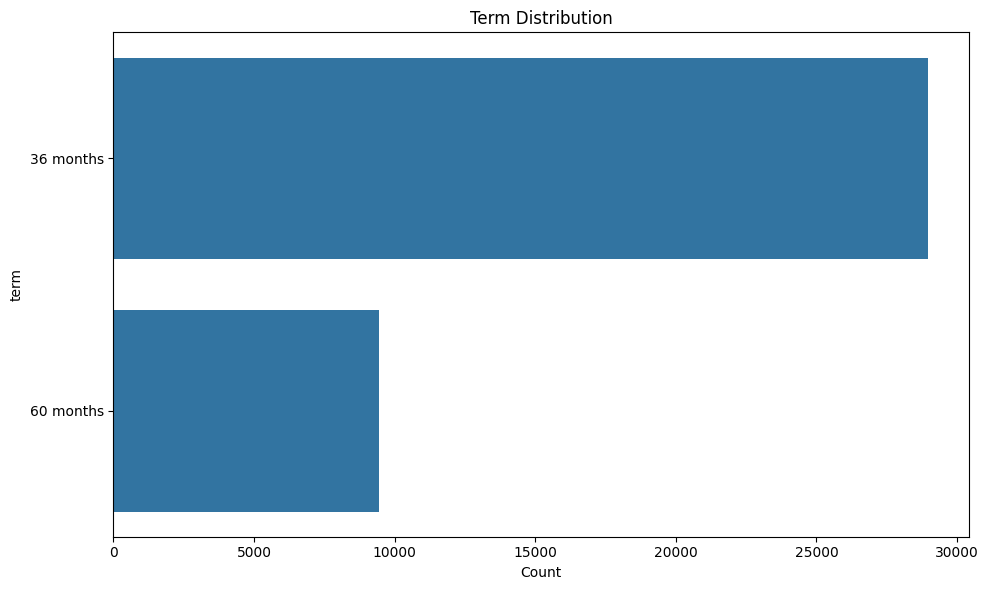

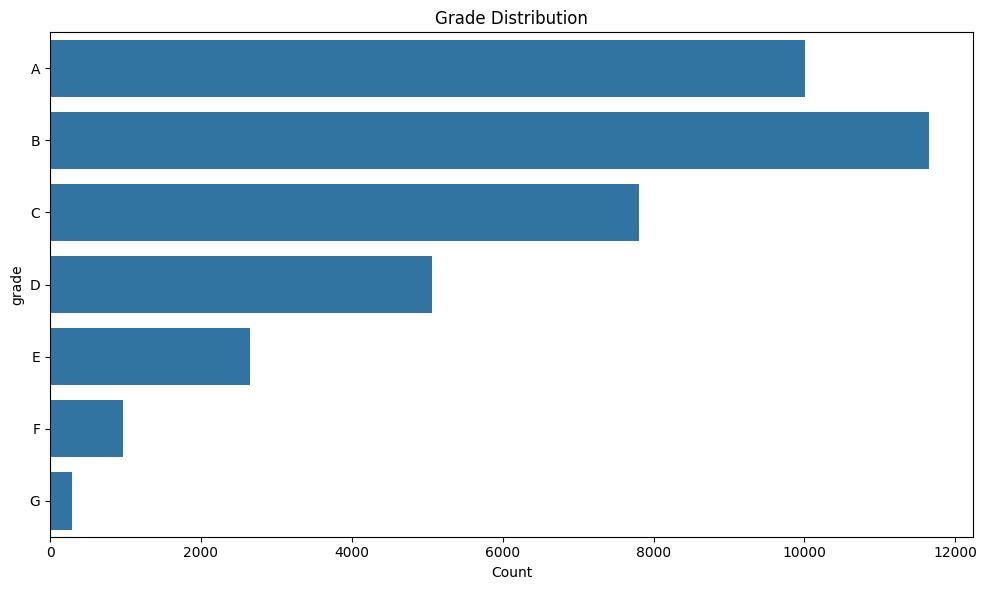

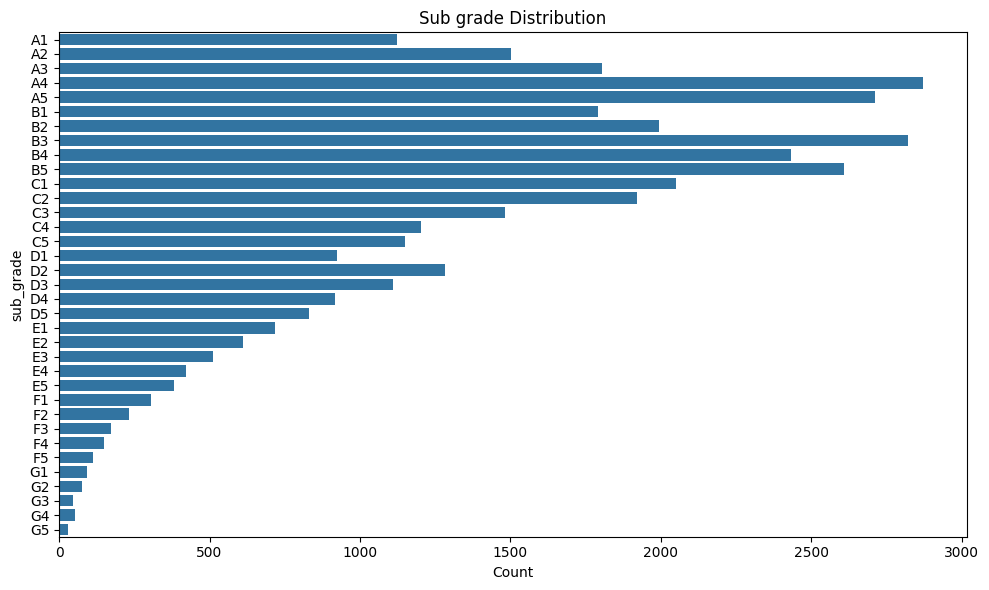

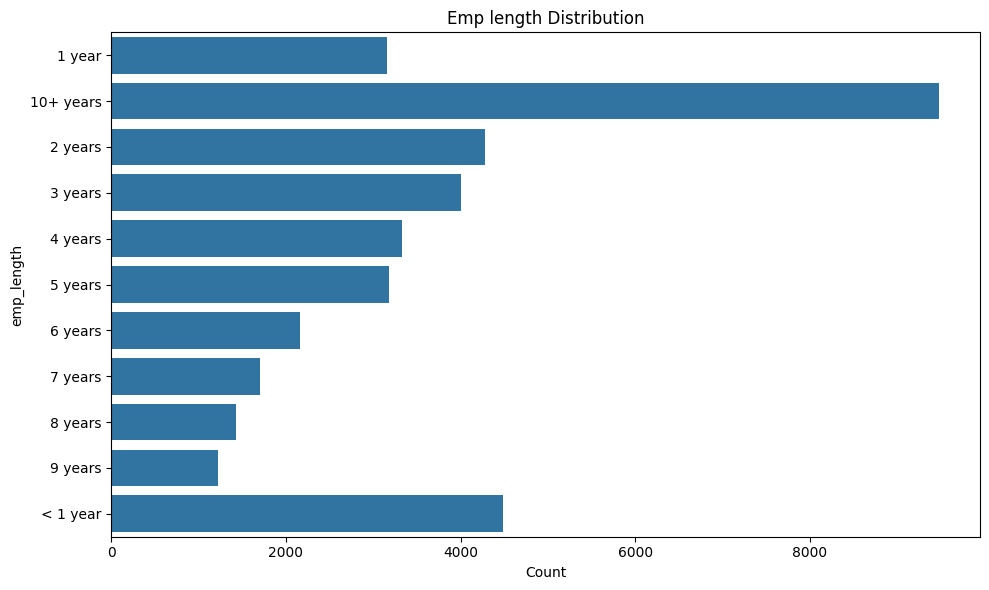

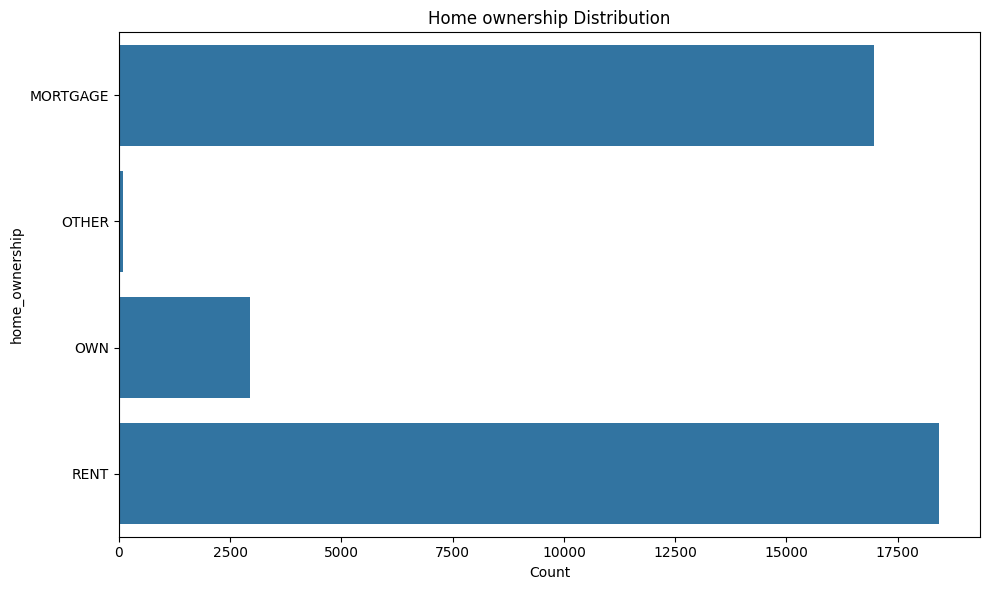

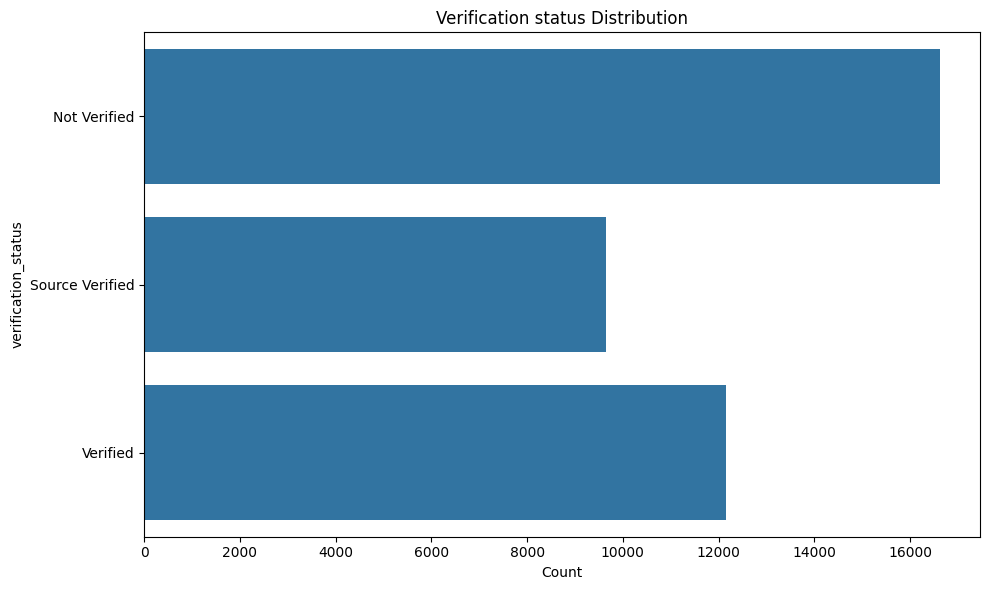

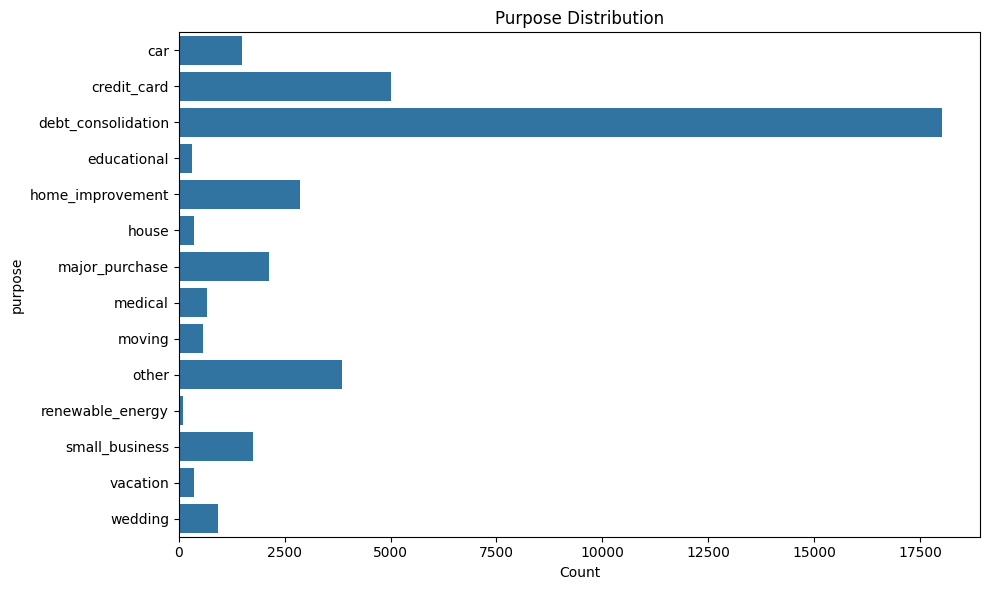

<Figure size 1000x600 with 0 Axes>

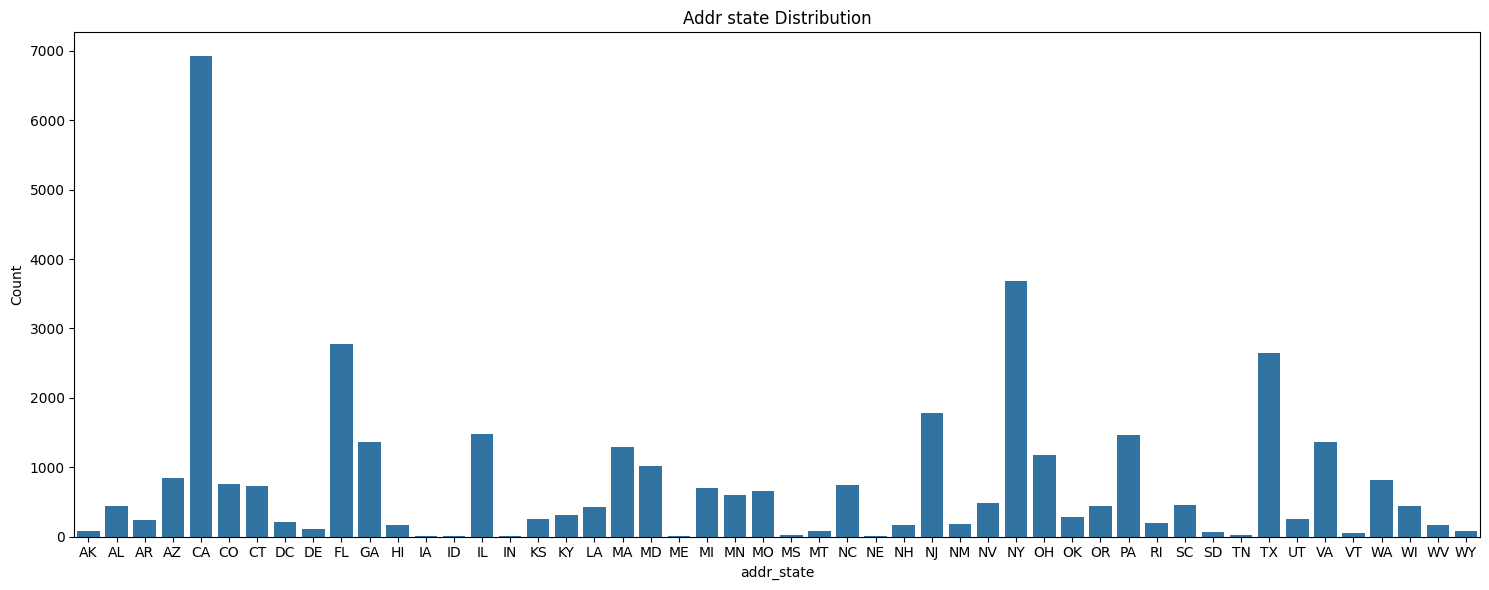

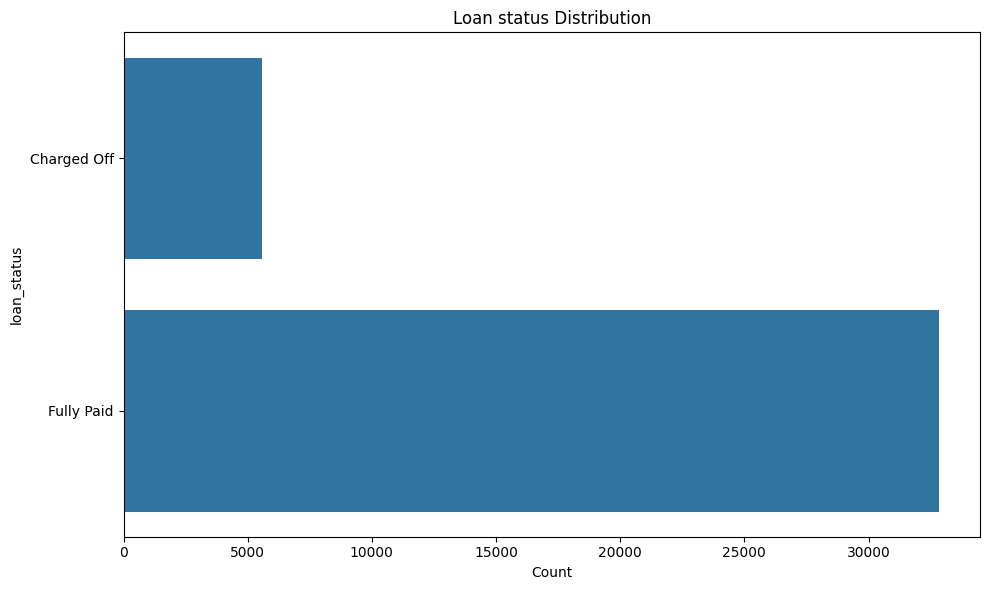

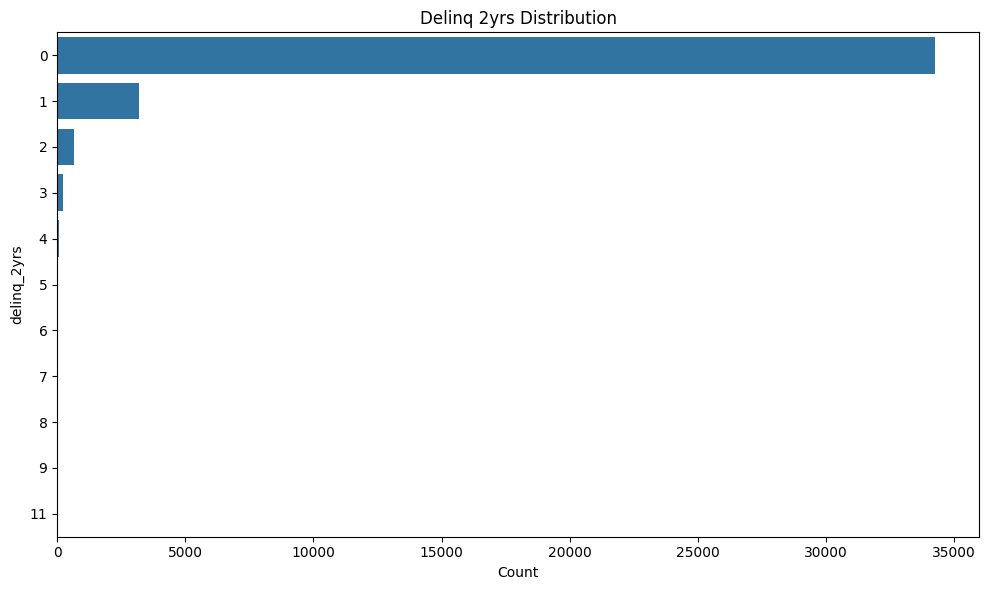

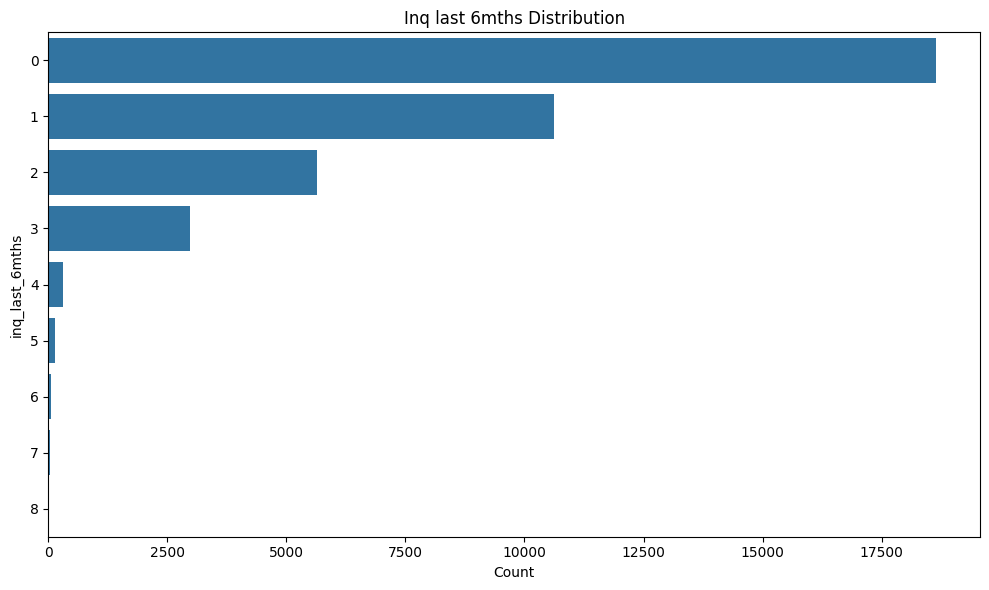

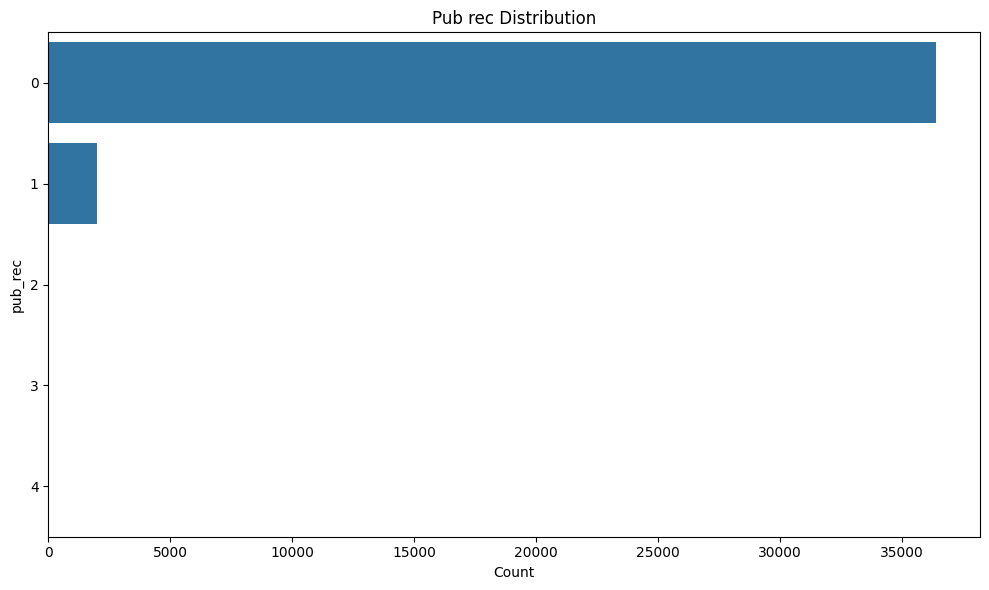

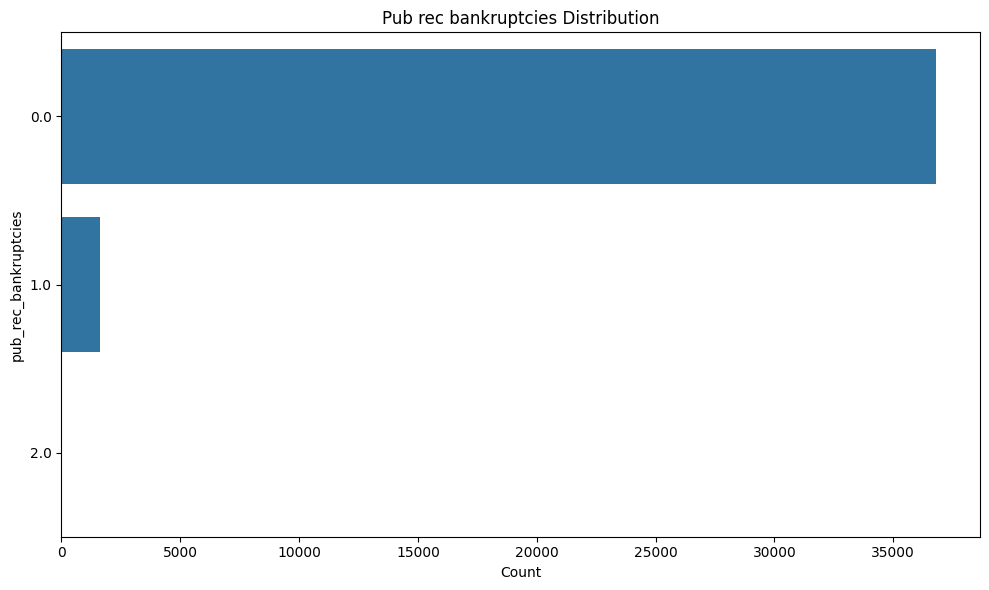

In [ ]:
# Analysing the count of values on each categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    if col in ["addr_state"]:
        plt.figure(figsize=(15, 6))
        sns.countplot(data, x=col, order=sorted(data[col].unique()), stat="count")
        plt.xlabel(col)
        plt.ylabel('Count')
    else:
        sns.countplot(data, y=col, order=sorted(data[col].unique()), stat="count")
        plt.ylabel(col)
        plt.xlabel('Count')
    plt.title(f'{col.replace("_", " ").capitalize()} Distribution')
    plt.tight_layout()
    plt.show()

**Observations from above plots, which might help us in further anlysis**
- The most common loan term is 36 months
- Highest number of loans are provided to people falling in grade B, followed by grade A and than grade C
- Each grade has 5 sub-categories
- Among the grades:
    - A: A4 has the highest followed by A5, A3, A2, A1
    - B: B3 has the highest followed by B5, B4, B2, B1
    - C: C1 has the highest followed by C2, C3, C4, C5
- People with 10+ years of experience has highest number on loans
- People having OWN home mare less likely to go for a loan, compared to others
- Mostly the loans are taken for debt consolidation (around 50% of the entire data)

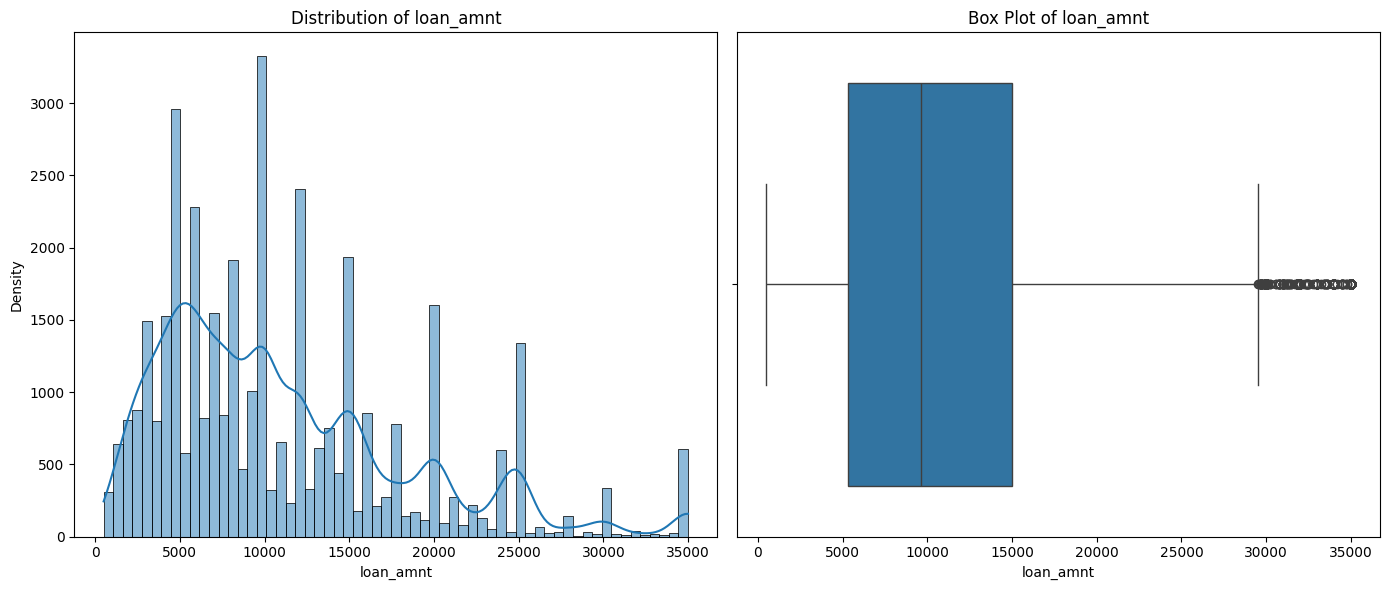

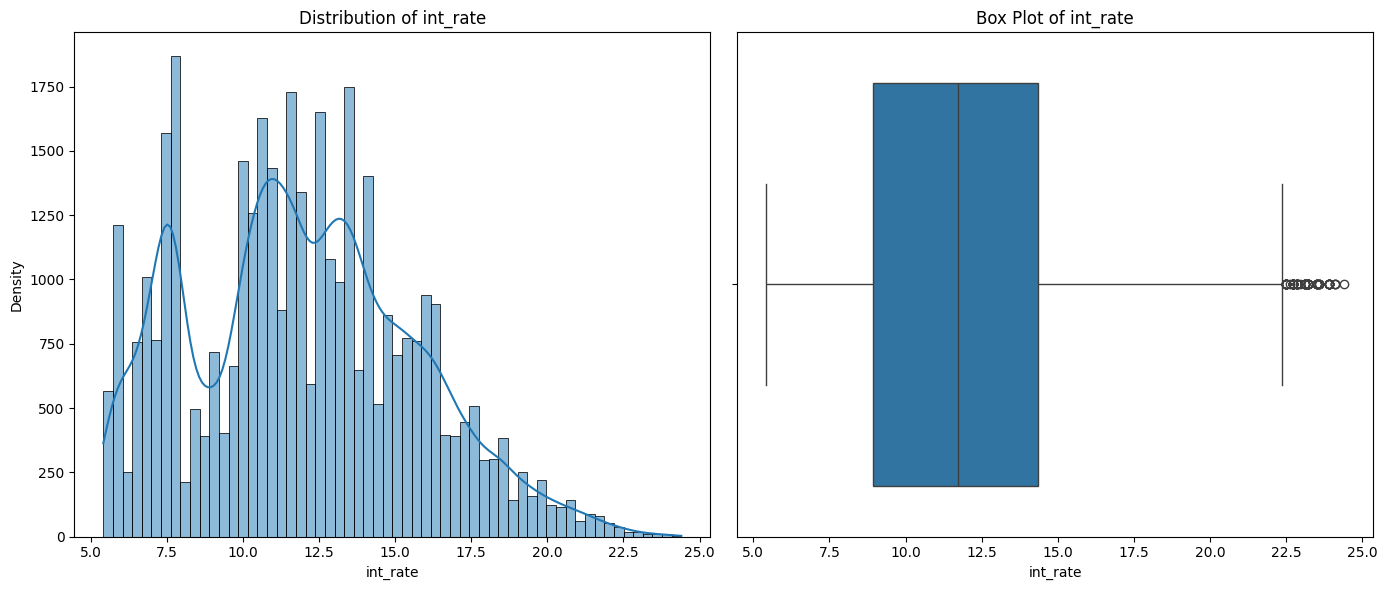

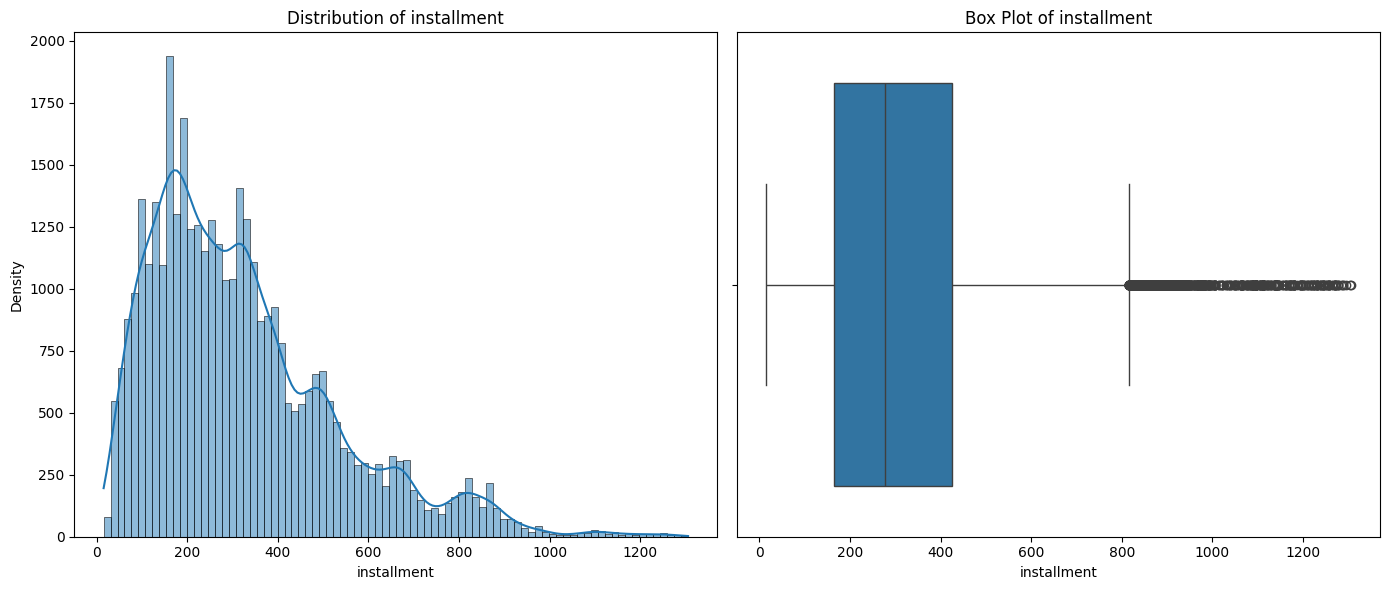

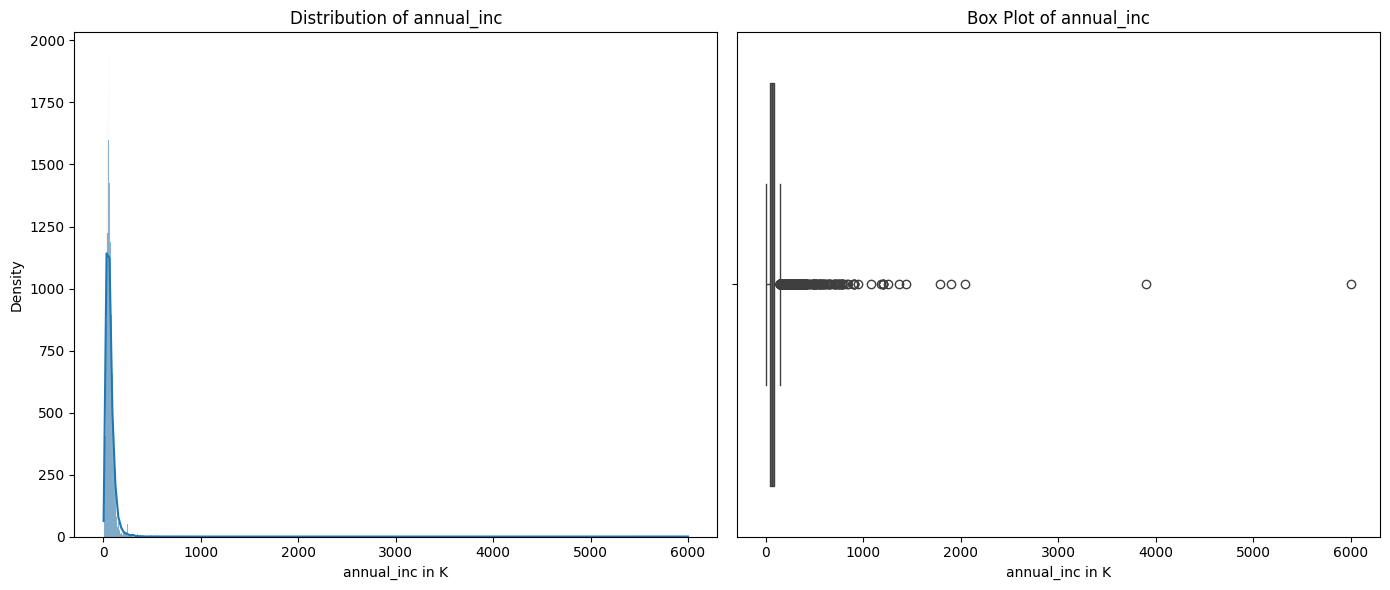

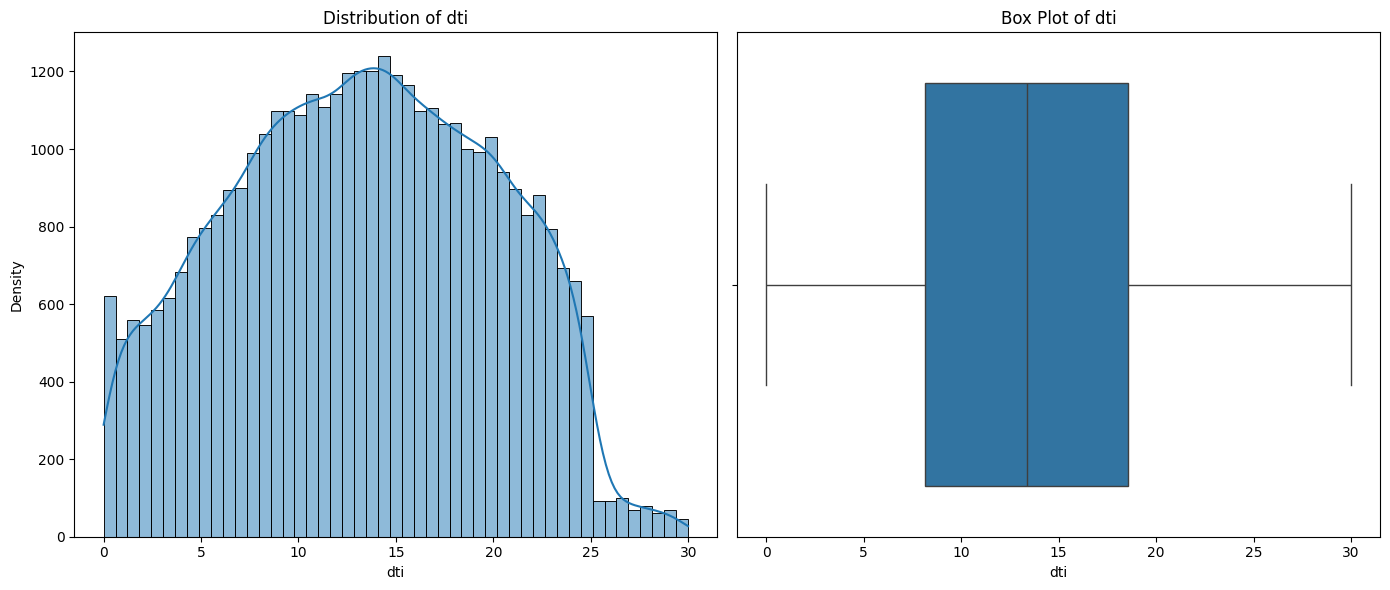

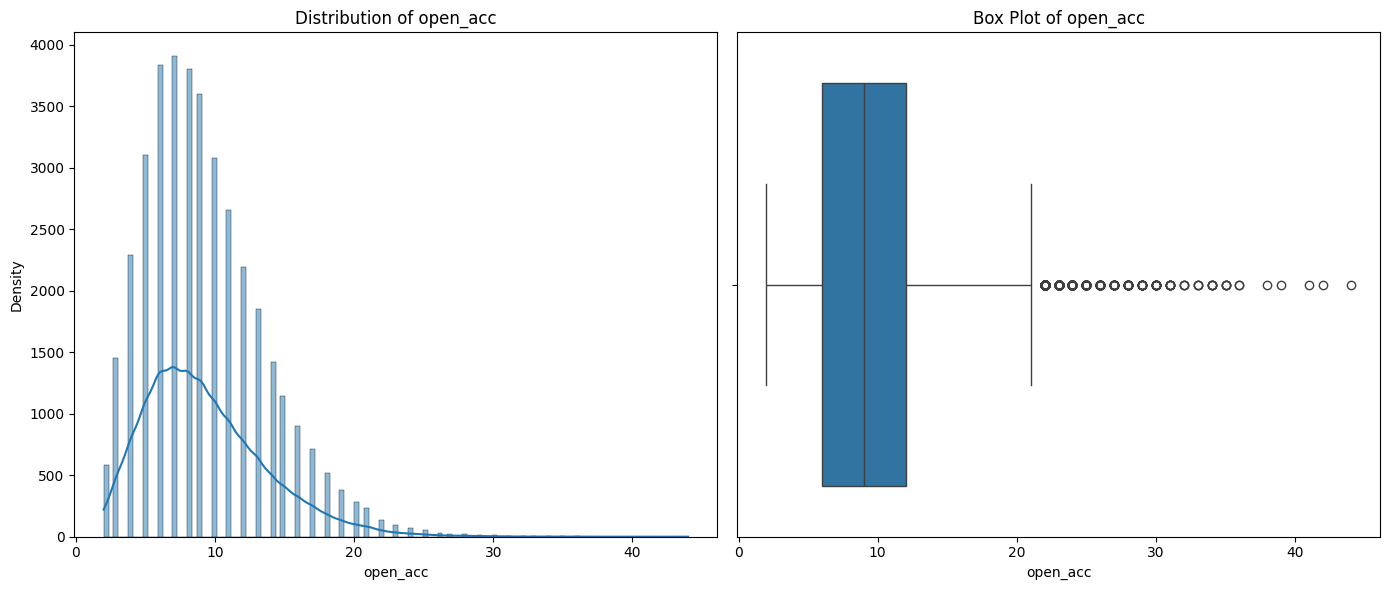

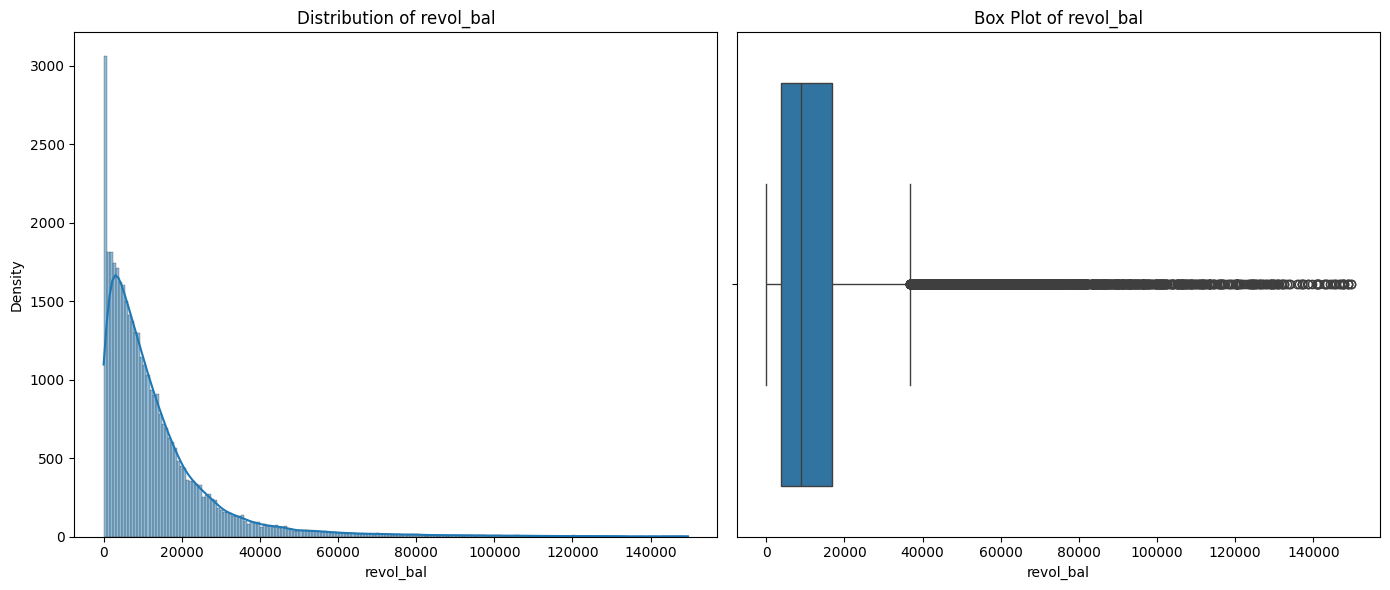

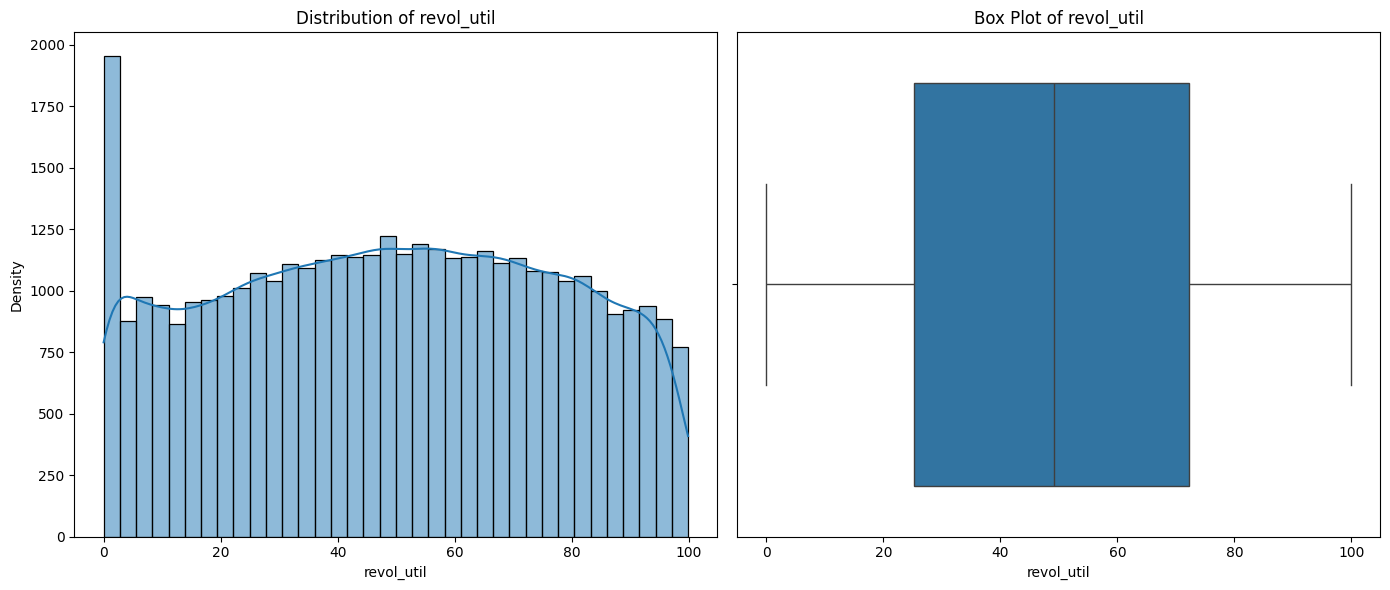

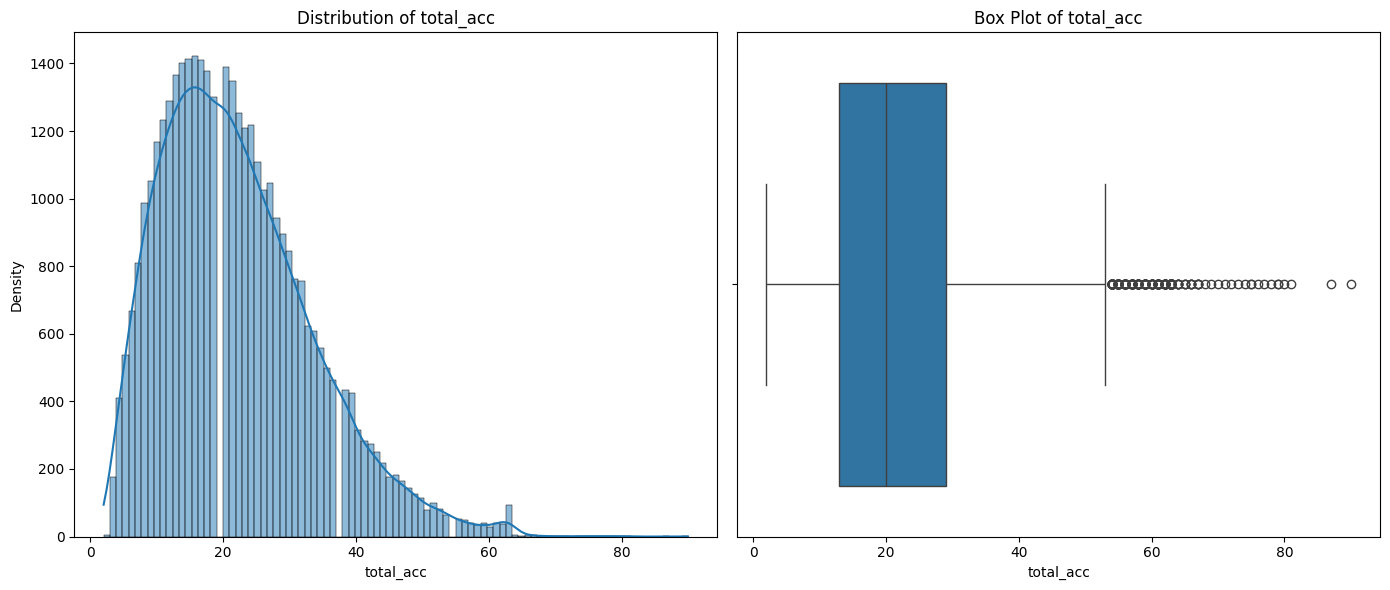

In [ ]:
# distplot and box plot for numerical columns

for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    if col == "annual_inc":
        sns.histplot(data[col]/1000, kde=True, ax=axes[0])
        sns.boxplot(x=data[col]/1000, ax=axes[1])
        axes[0].set_xlabel(f"{col} in K")
        axes[1].set_xlabel(f"{col} in K")
    else:
        sns.histplot(data[col], kde=True, ax=axes[0])
        sns.boxplot(x=data[col], ax=axes[1])
        axes[0].set_xlabel(col)
        axes[1].set_xlabel(col)

    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_ylabel('Density')

    axes[1].set_title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

**Observations from above plots, which might help us in further anlysis**
- 50% of the entire loan amount lies between 5K and 15K, and few outlier as the amount is more that 30K
- The interest rate lies between 5% to 25%
- 50% of the monthly installment lies in the range on 150 to 450, with a max value being 1.2K+
- The annual income is highly skewed with most of the values falling under 500K
- For revol balance as well it is skewed towards the left with most the values falling under 40K
- The revo util is mostly smooth, with just one evident spike near to zero, which show that most of the people tend to util rate low.

### Bivariate Analysis

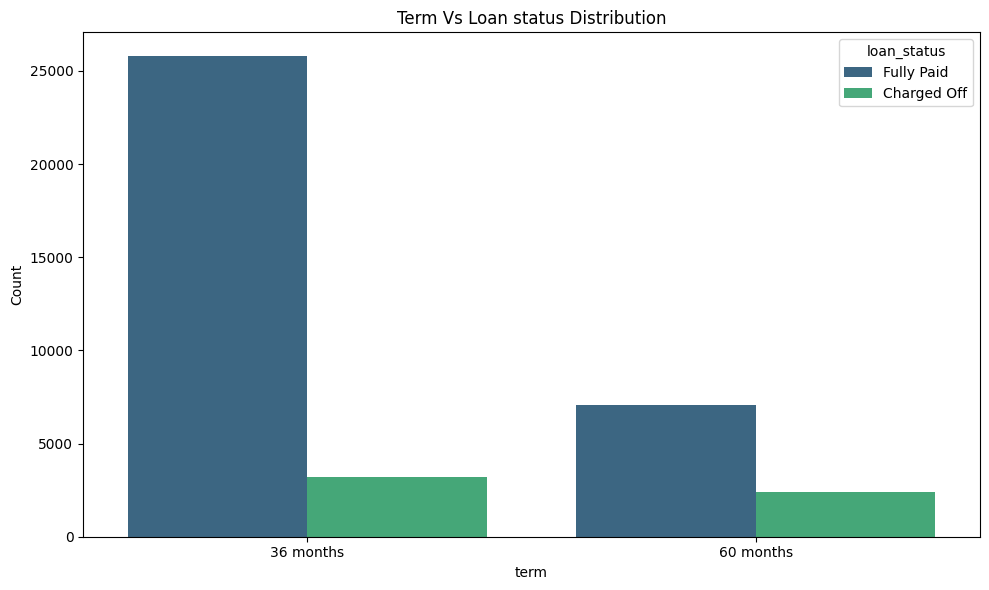

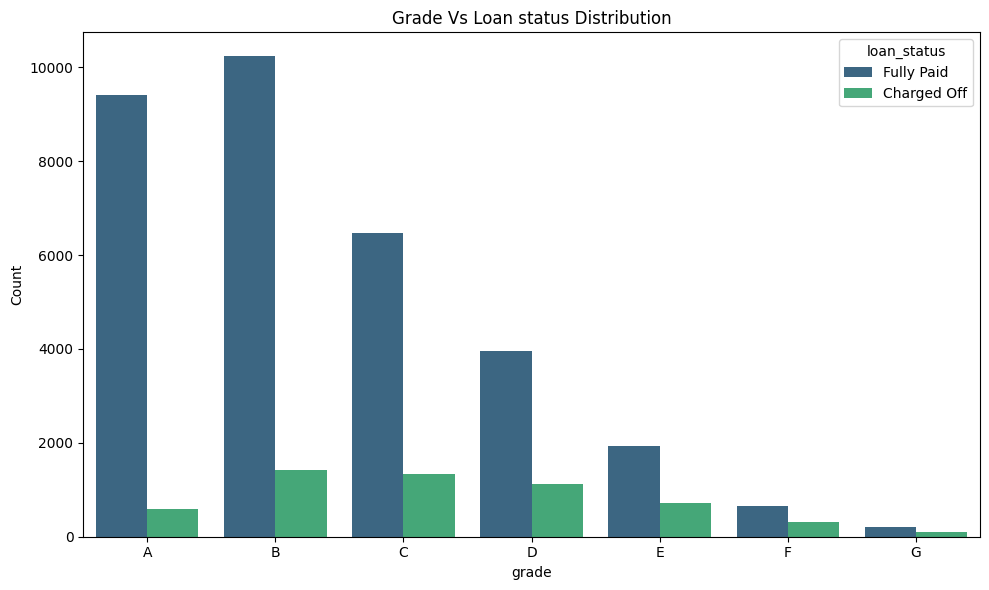

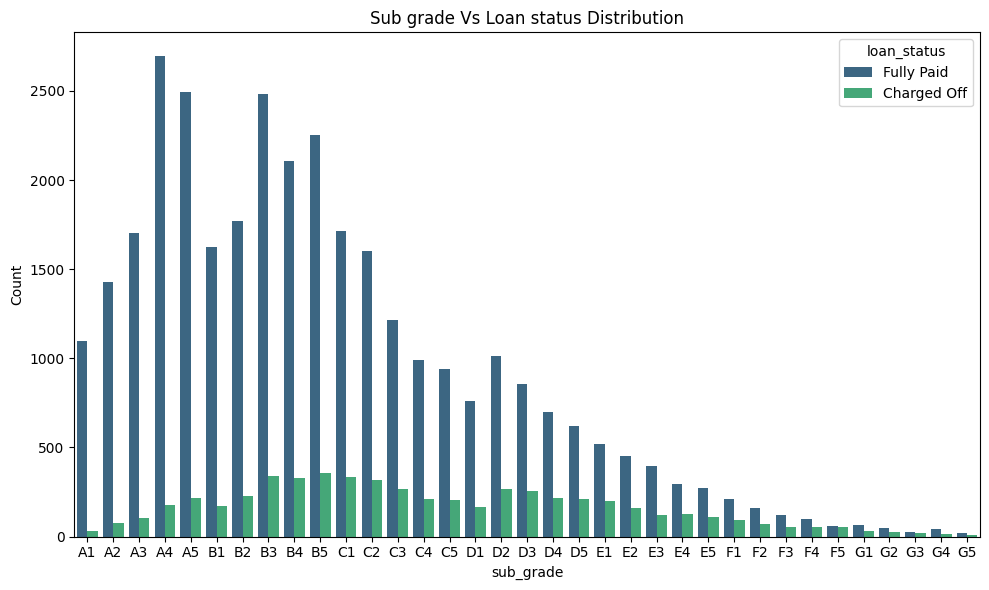

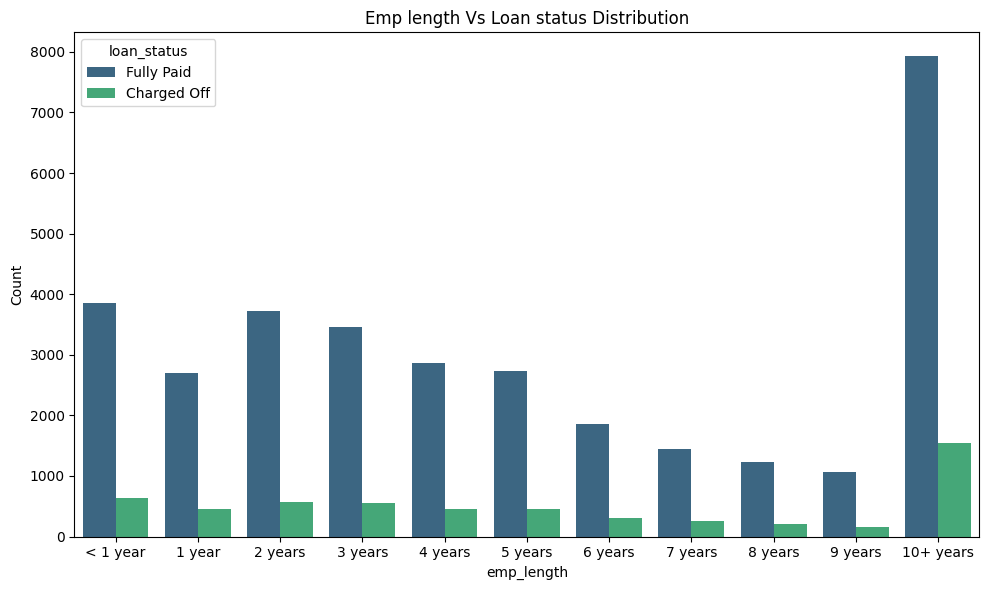

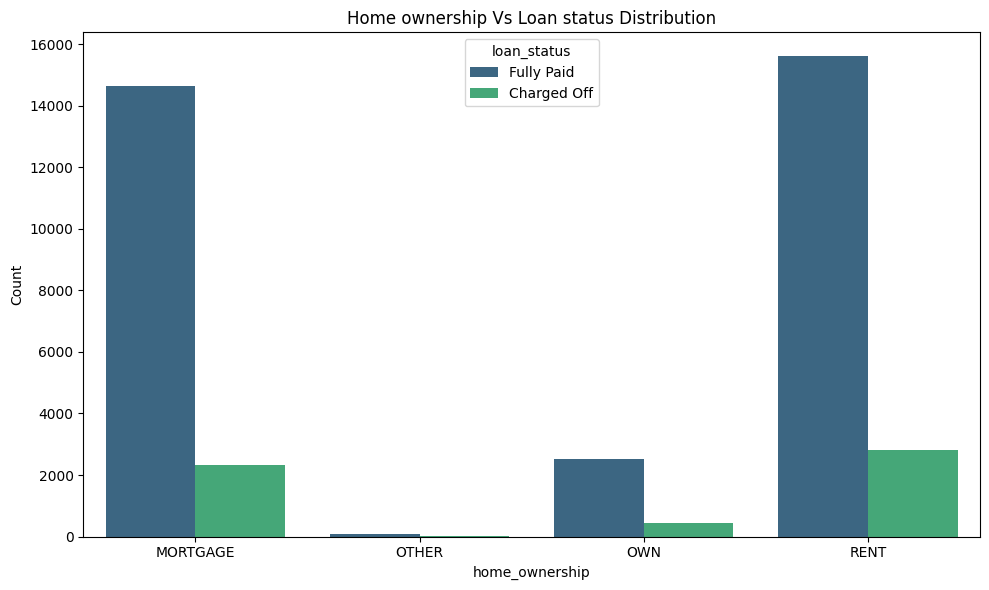

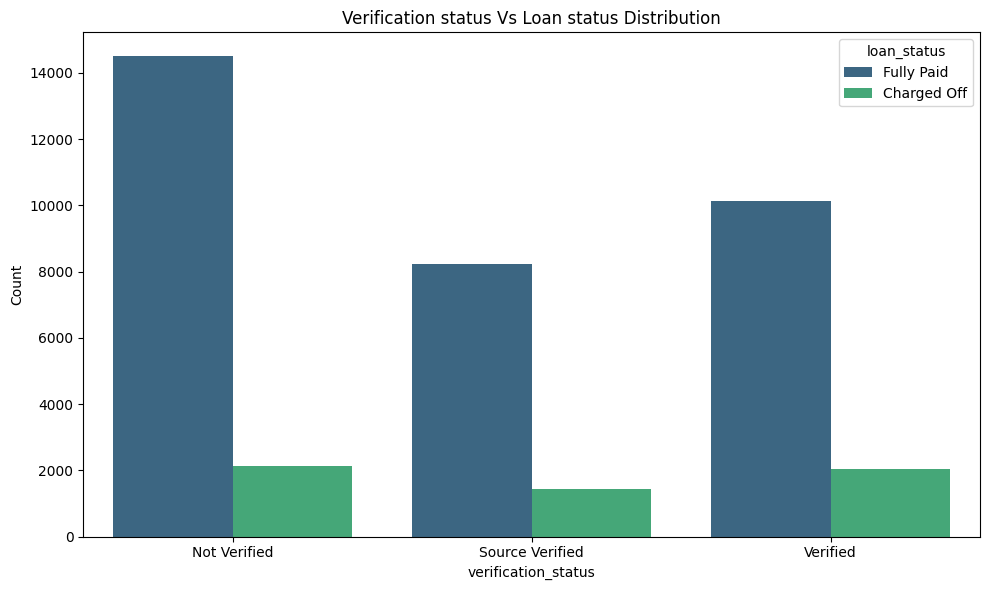

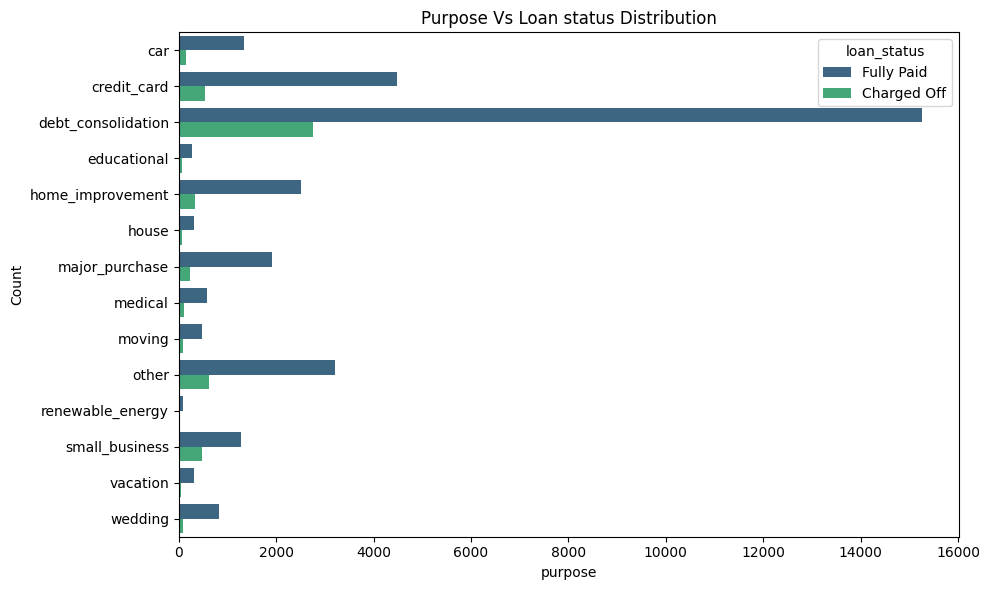

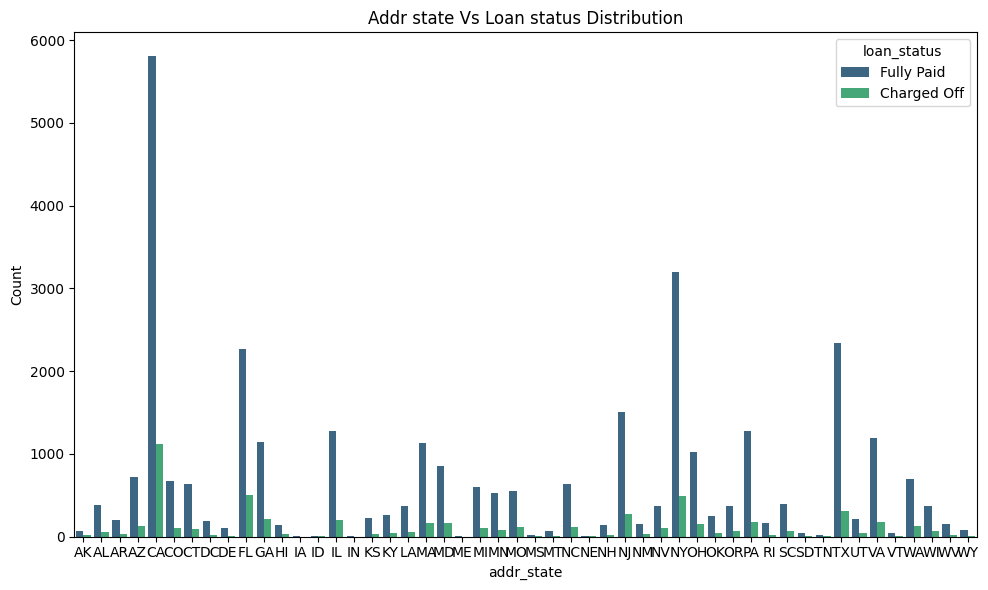

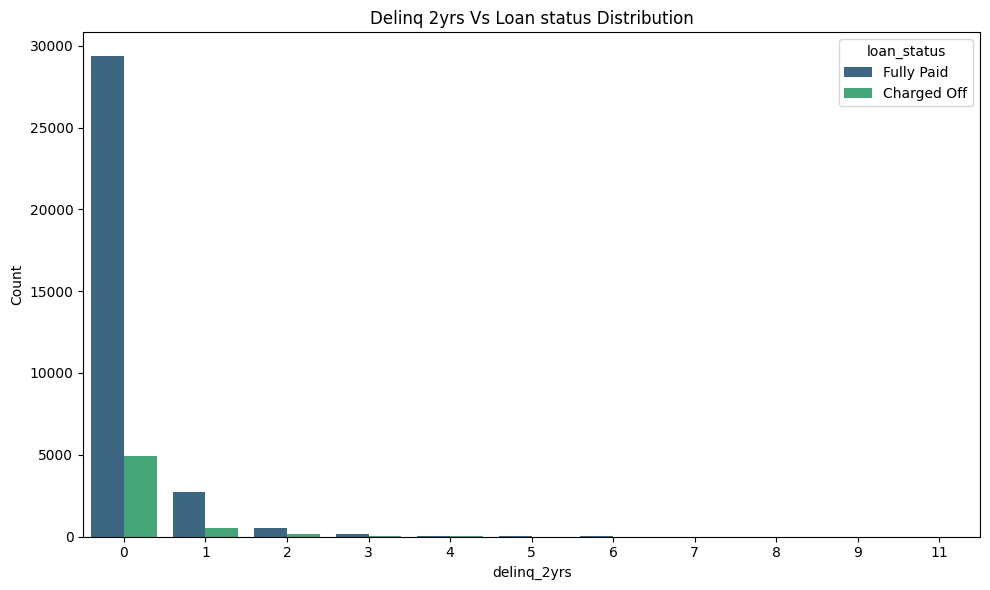

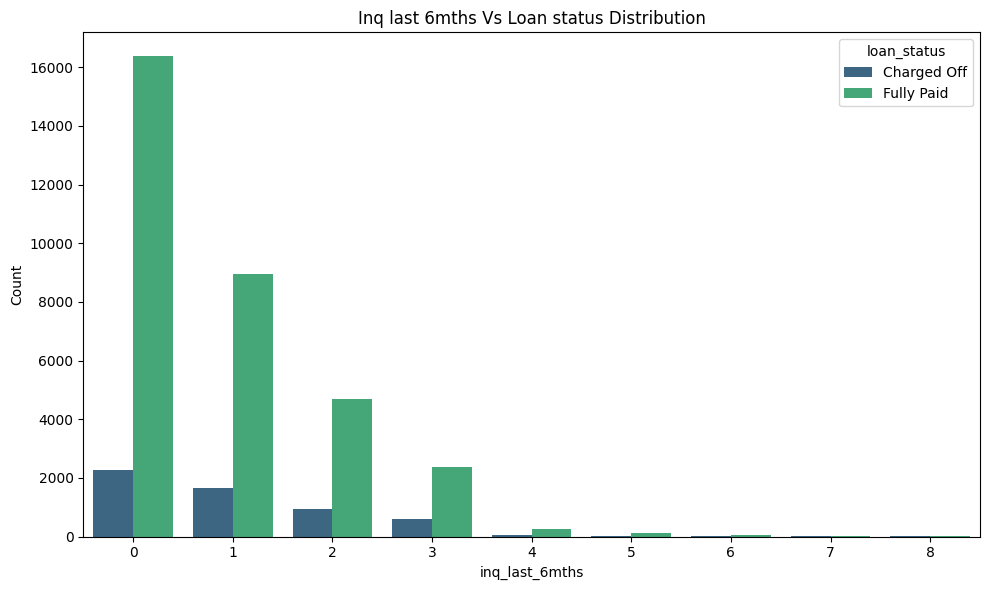

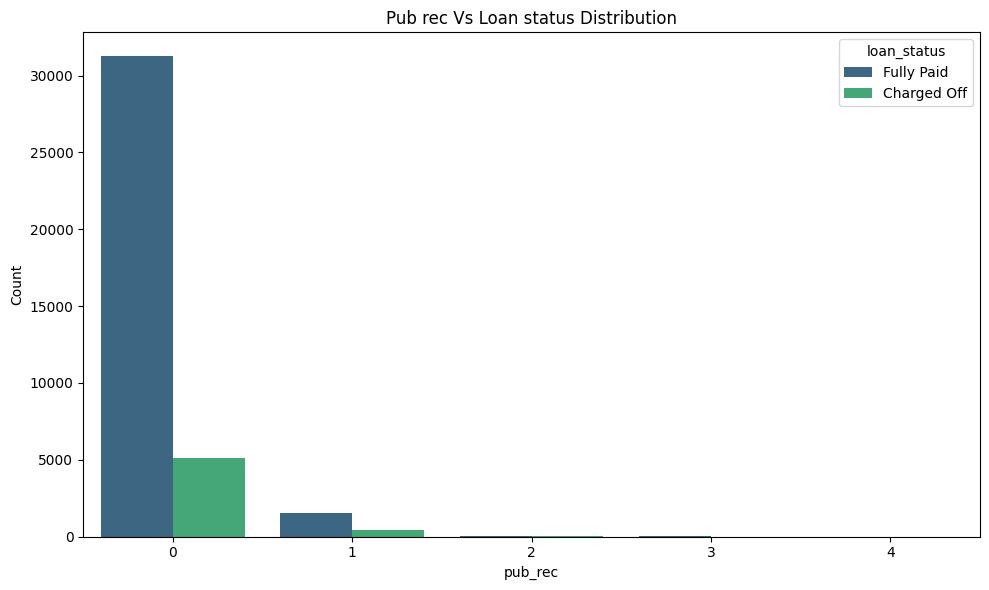

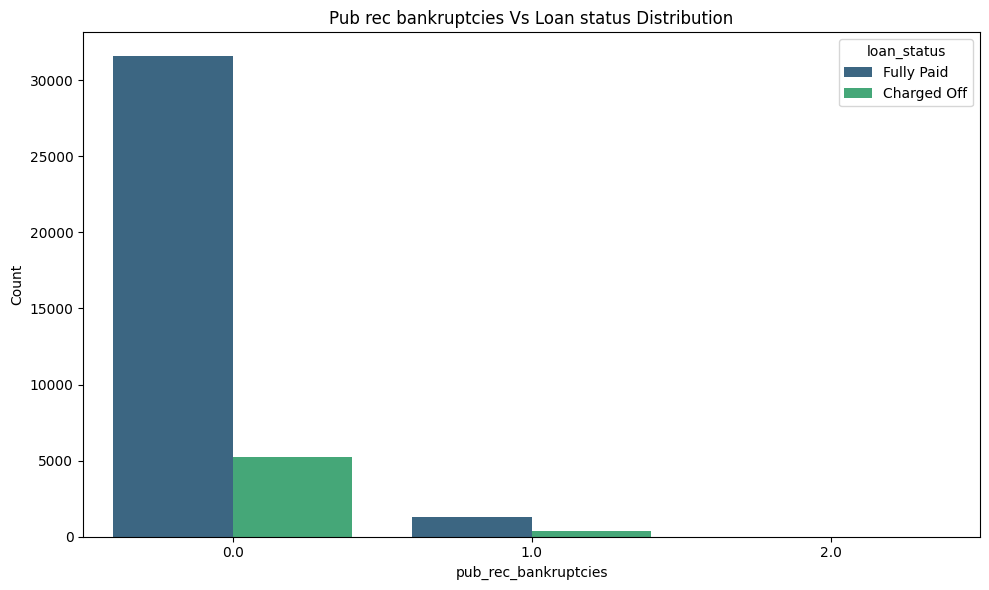

In [ ]:
# Analysing the count of values for each loan status based on each categorical variables
for col in categorical_columns:
    if col == target_column:
        continue
    plt.figure(figsize=(10, 6))
    if col in ["purpose"]:
        fig = sns.countplot(data=data, y=col, hue=target_column, order=sorted(data[col].unique()), palette='viridis')
    elif col == "emp_length":
        order = sorted(data[col].unique(), key=lambda x: 0 if "<" in x else int(10 if "+" in x.split(" ")[0] else x.split(" ")[0]))
        fig = sns.countplot(data=data, x=col, hue=target_column, order=order, palette='viridis')
    else:
        fig = sns.countplot(data=data, x=col, hue=target_column, order=sorted(data[col].unique()), palette='viridis')
    fig.set_xlabel(col)
    fig.set_ylabel('Count')
    fig.set_title(f'{col.replace("_", " ").capitalize()} Vs {target_column.replace("_", " ").capitalize()} Distribution')
    plt.tight_layout()
    plt.show()

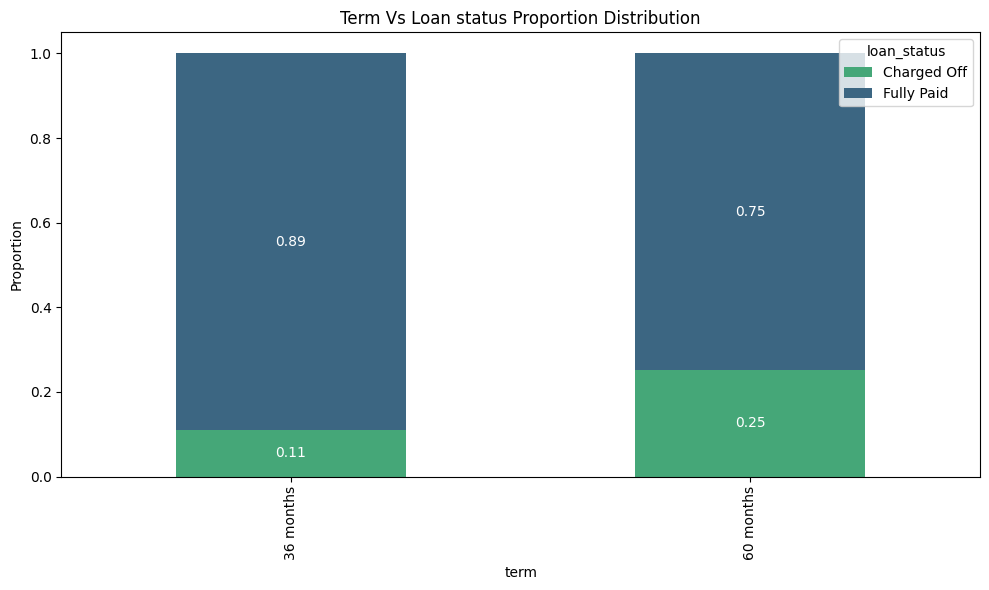

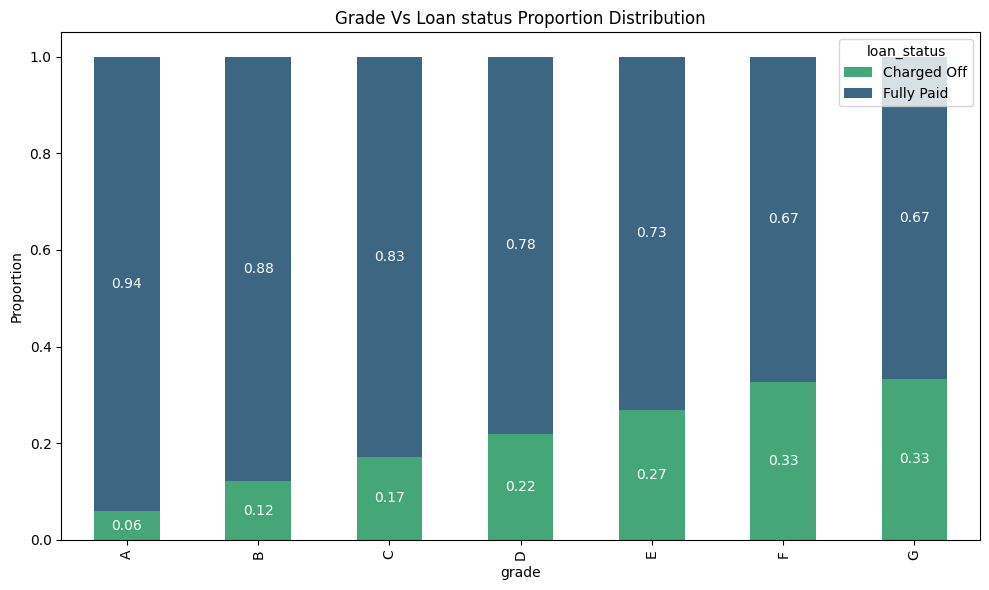

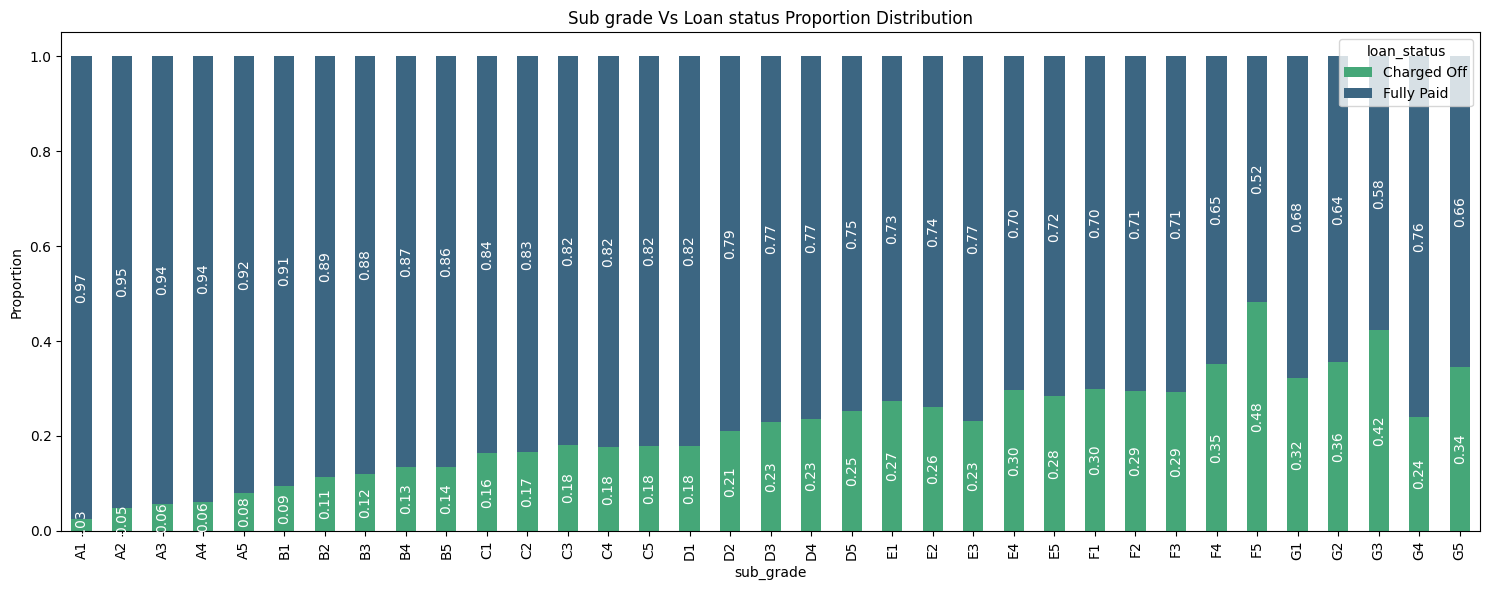

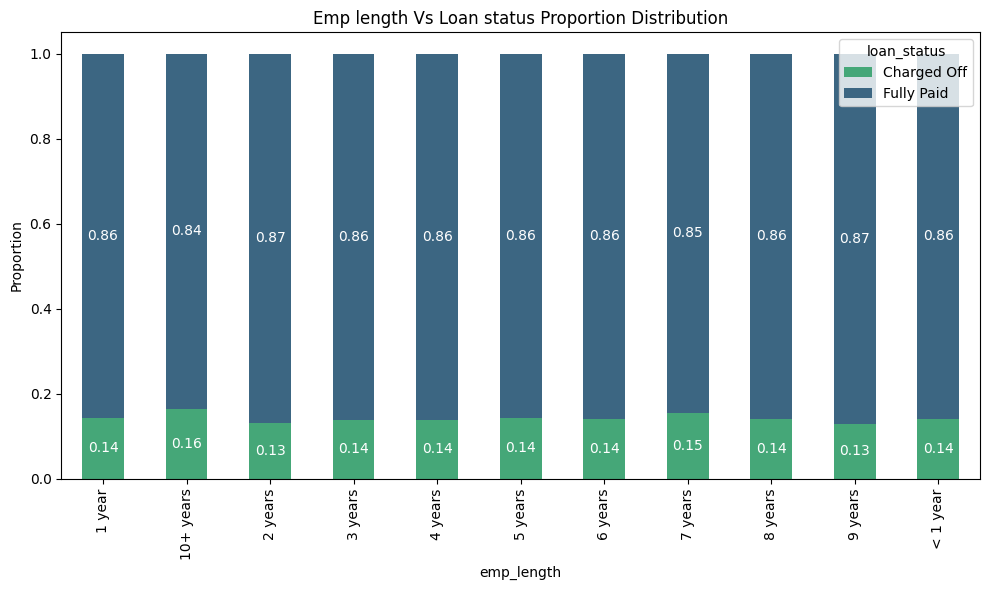

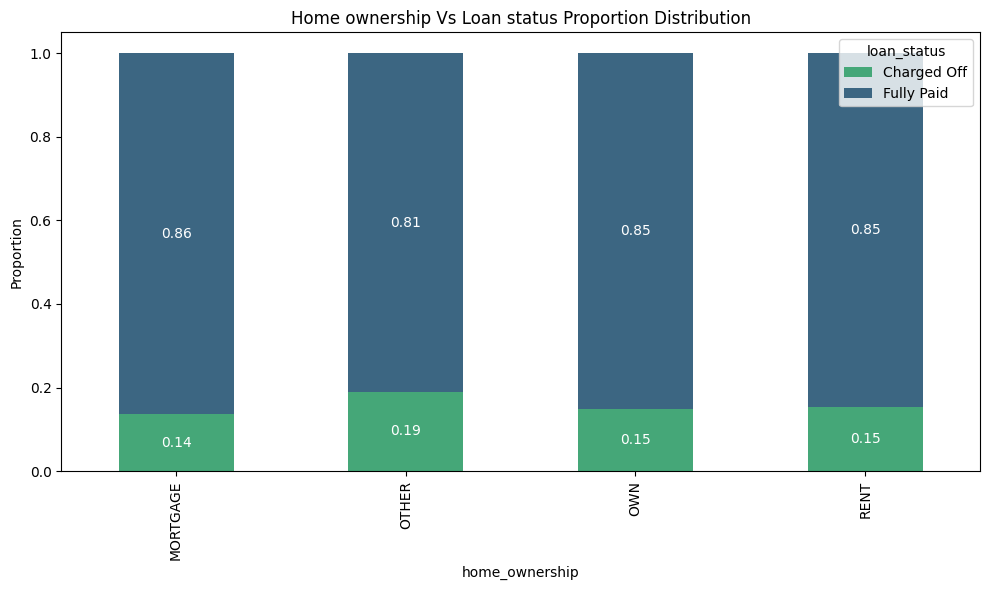

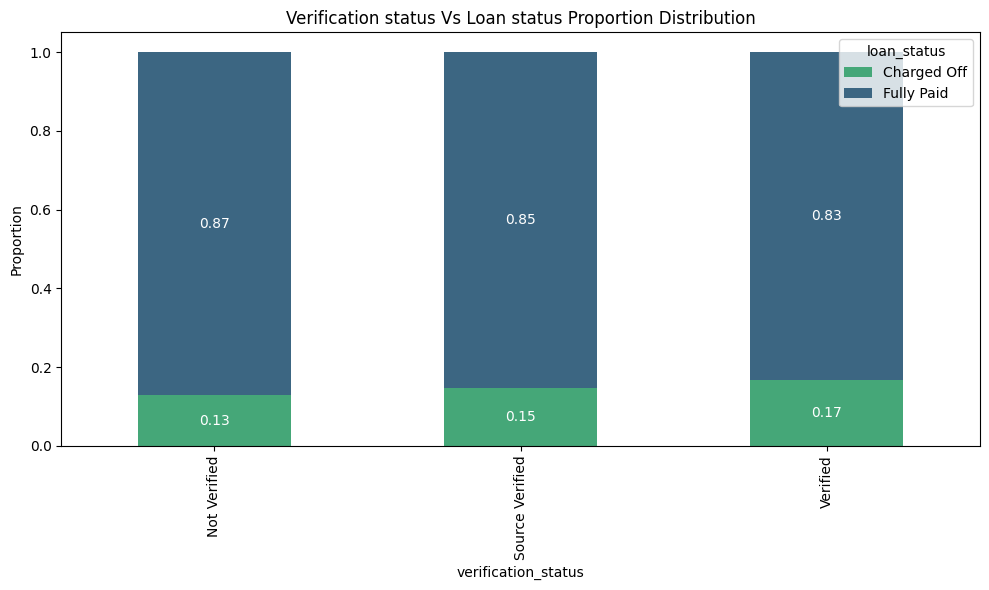

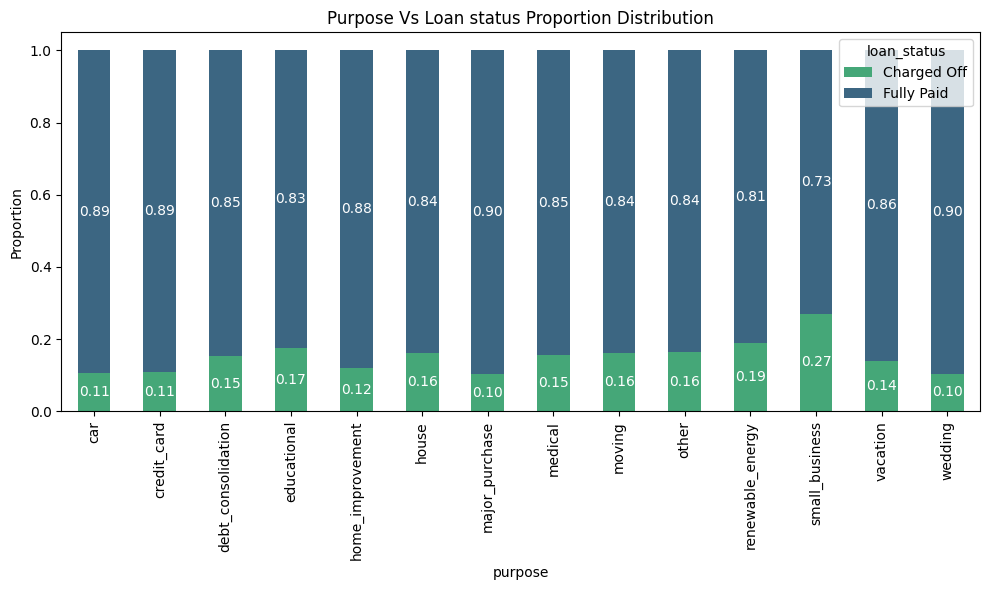

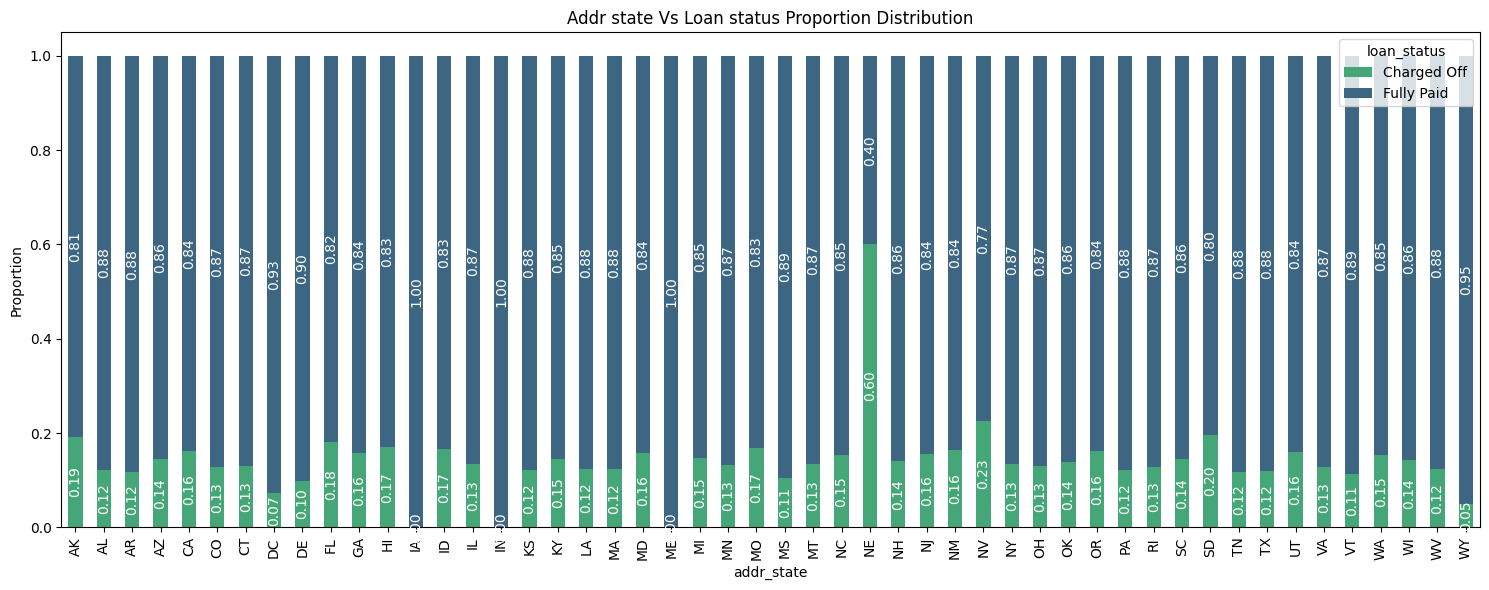

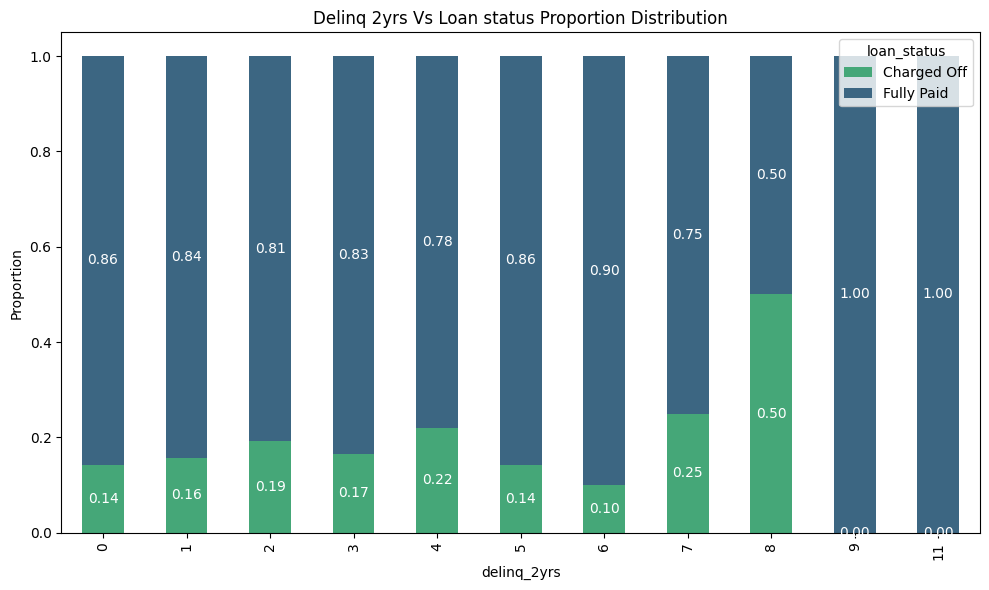

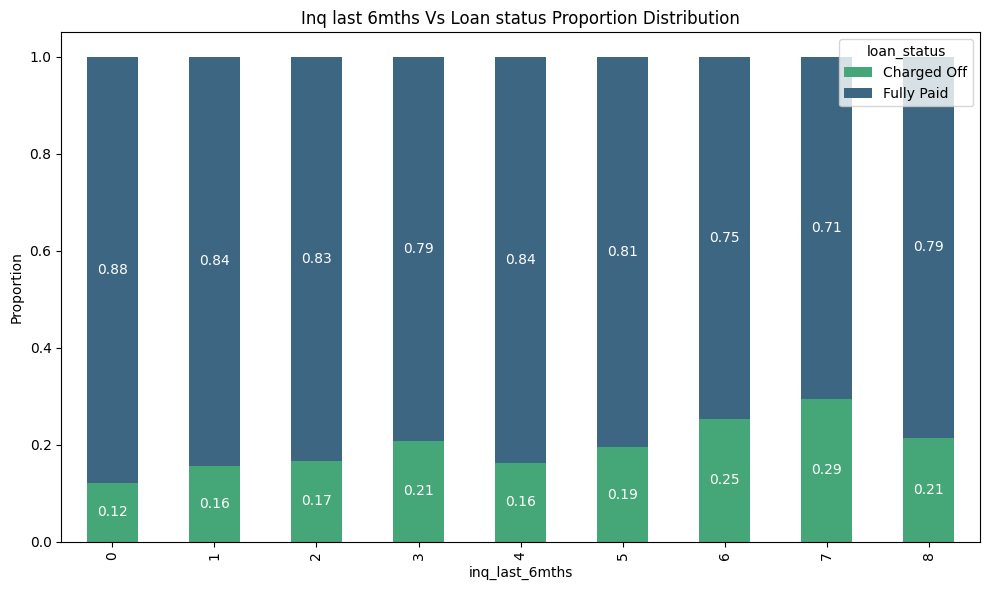

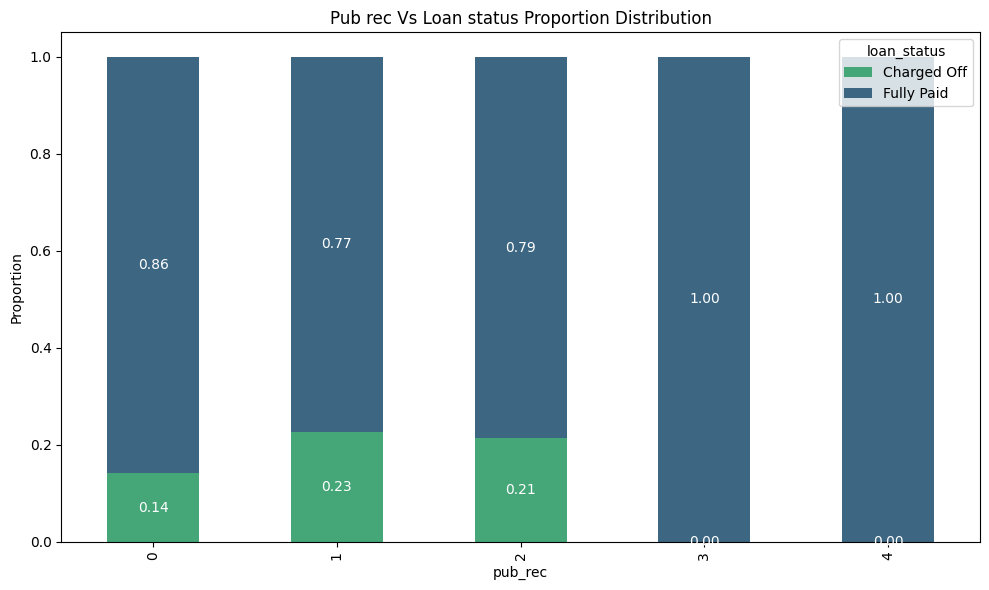

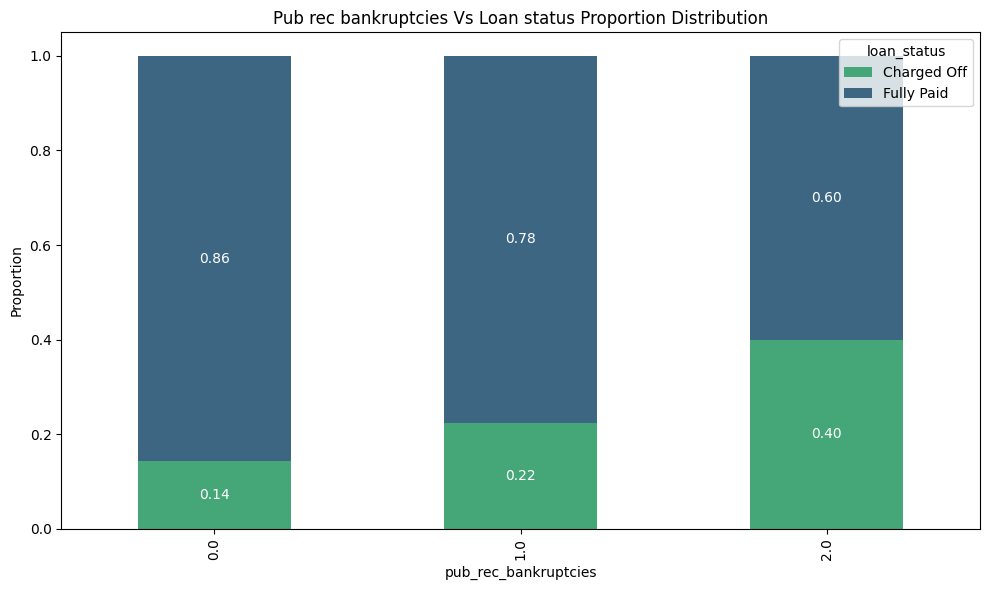

In [ ]:
# Analysing the count of values for each loan status based on each categorical variables, Proportion of loan status along each
for col in categorical_columns:
    if col == target_column:
        continue
    d = data.groupby([col, 'loan_status']).size().unstack(fill_value=0)
    ax = d.div(d.sum(axis=1), axis=0).plot(
                                            kind = 'bar',
                                            stacked = True,
                                            figsize = (15, 6) if col in ["sub_grade", "addr_state"] else (10, 6),
                                            title = f'{col.replace("_", " ").capitalize()} Vs {target_column.replace("_", " ").capitalize()} Proportion Distribution',
                                            ylabel = 'Proportion',
                                            xlabel = col,
                                            color=['#45a778', '#3c6682']
                                        )
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        # if height > 0:
        ax.annotate(
                f'{height:.2f}',
                (x + width / 2, y + height / 2),
                ha = 'center',
                va = 'center',
                fontsize = 10,
                color = 'white',
                rotation = 90 if col in ["sub_grade", "addr_state"] else 0
            )
    plt.legend(loc='upper right', title=target_column)
    plt.tight_layout()
    plt.show()

**Observations from above plots, which might help us in further anlysis**
- For loan term the proportion of charged off for term 60 months is double of 36 months
- The Charged off proportion increases as grade moves from A to G, and similarly it goes for its sub-grade. With an exception for F5 which is highest than others
- For emp length there is no sugnificate difference in charged off proportion, *so entire feature can be removed*
- In-case of home ownership the charged off rate in highest for category "OTHER", compared to the rest of the categories
- For verification status is tends to increase from Not Verified to Verified
- For Purpose, small businesses tends to have more charged off rates
- State Addr "NE", has the highest charged off rate
- For pub rec bankreupcties, charged of rate increase with count

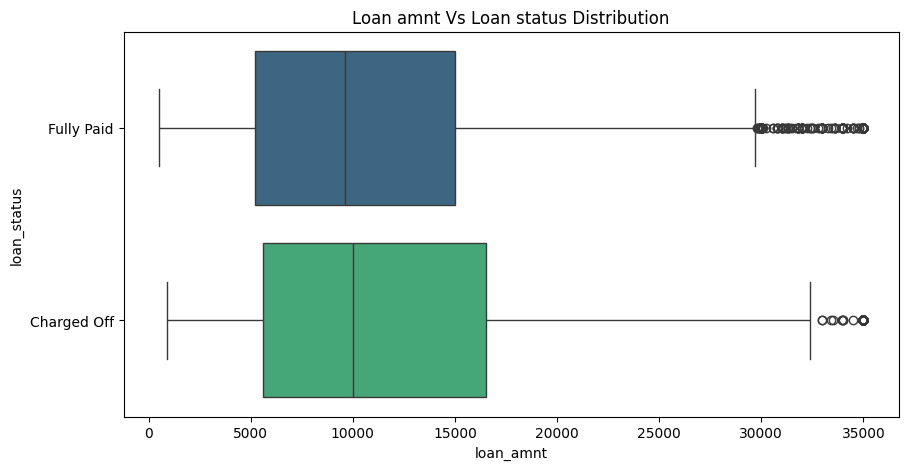

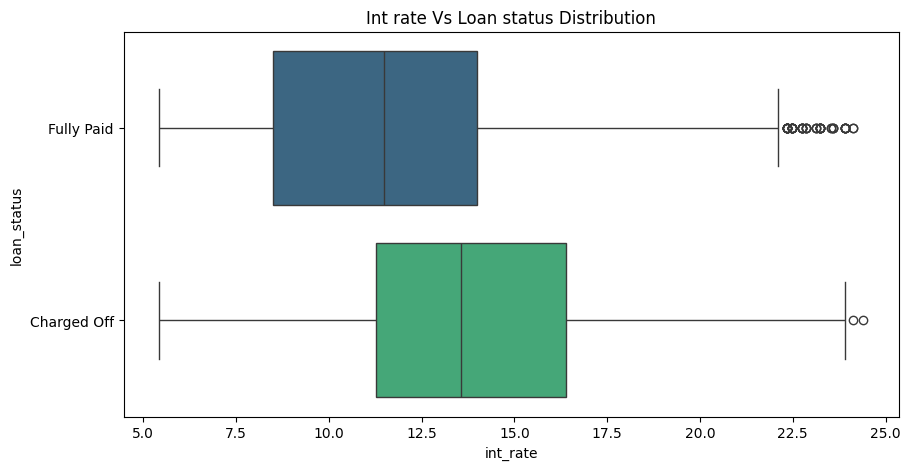

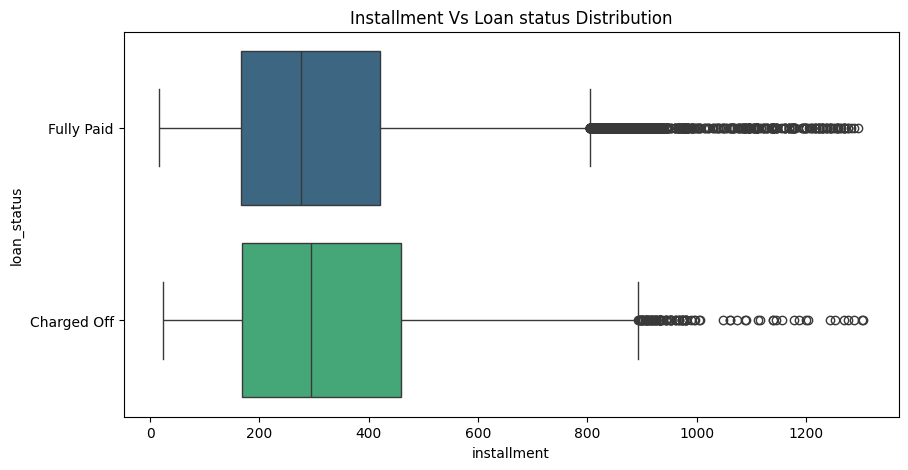

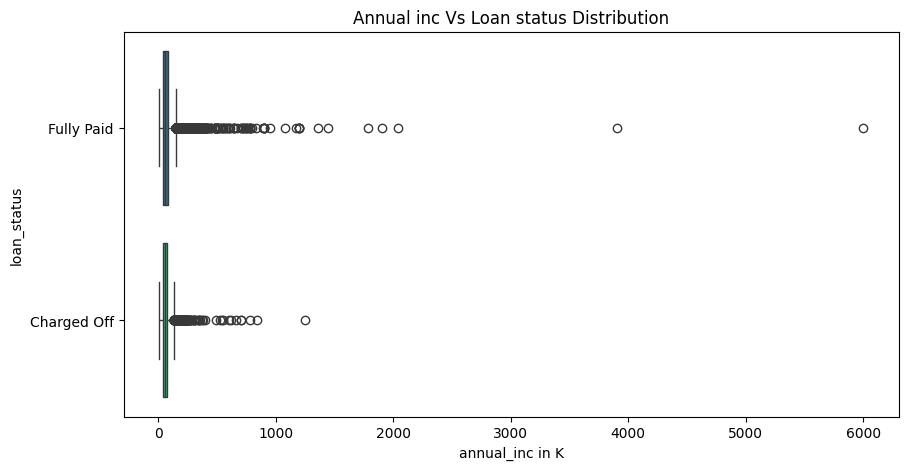

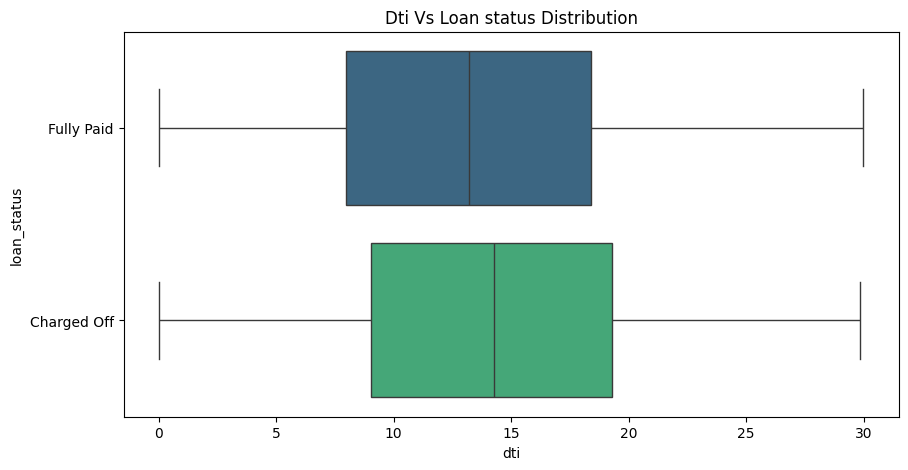

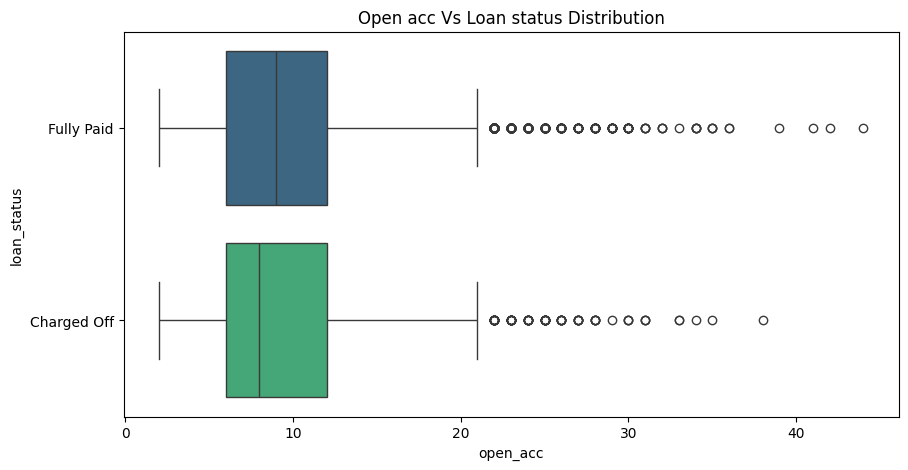

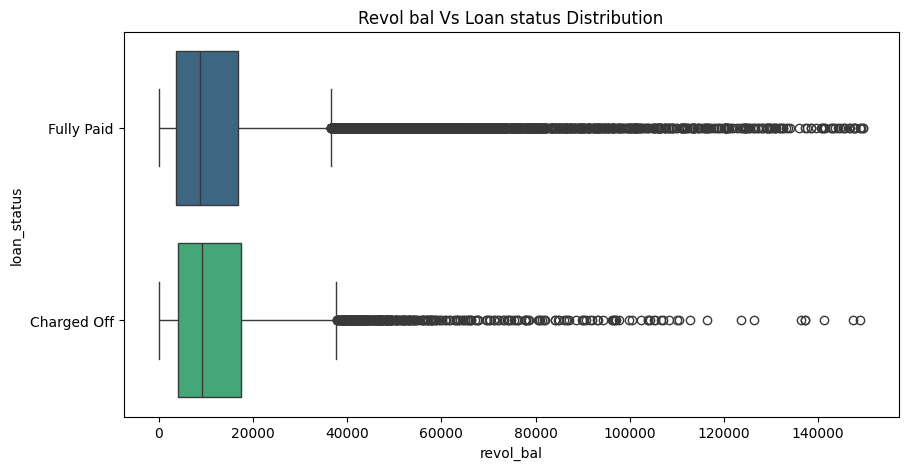

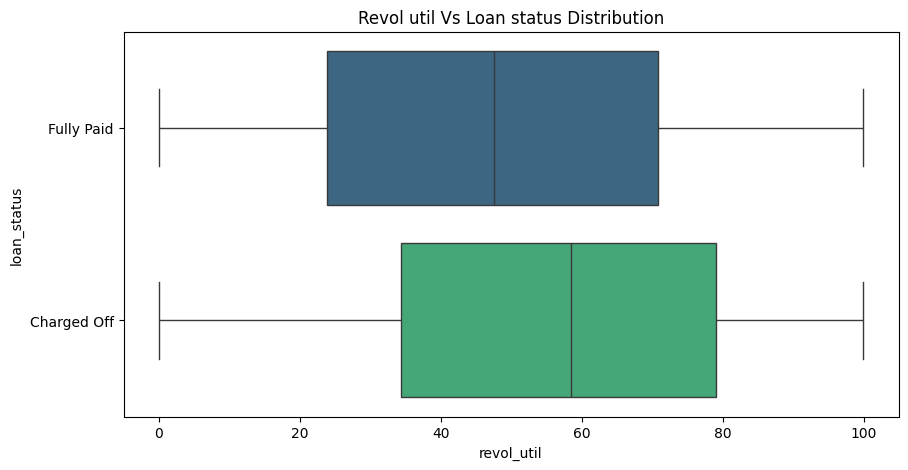

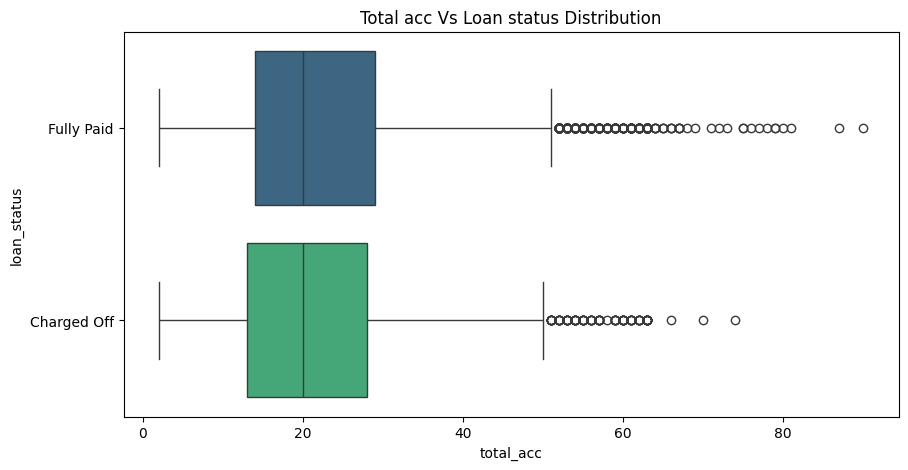

In [ ]:
# Analysing the count of values for each loan status based on each numerical variables
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    if col == "annual_inc":
        sns.boxplot(y=data[target_column].values, x=data[col].values/1000, palette='viridis')
        plt.xlabel(f"{col} in K")
    else:
        sns.boxplot(data=data, y=target_column, x=col, palette='viridis')
        plt.xlabel(col)

    plt.title(f'{col.replace("_", " ").capitalize()} Vs {target_column.replace("_", " ").capitalize()} Distribution')
    plt.ylabel(target_column)
    plt.show()

**Observations based on above visuals**
- Will be treating the outliers in 'loan_amnt', 'int_rate','installment','annual_inc'. And will remove the columns where the distribution is kind of similar like 'open_acc', 'total_acc', 'revol_bal'

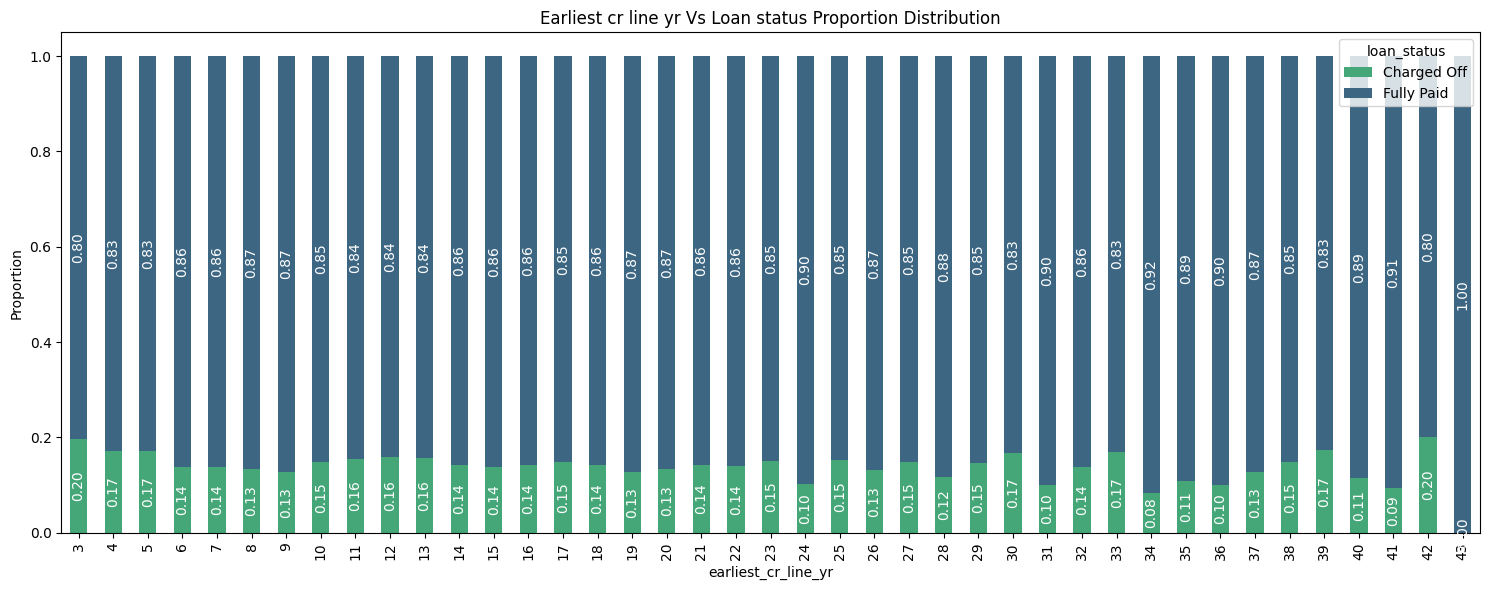

In [ ]:
# Analysing the issue_date and earliest credit line
d = data.copy()
d["earliest_cr_line_yr"] = (data.issue_d - data.earliest_cr_line).apply(lambda x: round(x.days/365))

dg = d.groupby(["earliest_cr_line_yr", target_column]).size().unstack(fill_value=0)
ax = dg.div(dg.sum(axis=1), axis=0).plot(
                                            kind = 'bar',
                                            stacked = True,
                                            figsize = (15, 6),
                                            title = f'{"earliest_cr_line_yr".replace("_", " ").capitalize()} Vs {target_column.replace("_", " ").capitalize()} Proportion Distribution',
                                            ylabel = 'Proportion',
                                            xlabel = "earliest_cr_line_yr",
                                            color=['#45a778', '#3c6682']
                                        )
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    # if height > 0:
    ax.annotate(
            f'{height:.2f}',
            (x + width / 2, y + height / 2),
            ha = 'center',
            va = 'center',
            fontsize = 10,
            color = 'white',
            rotation = 90
        )
plt.legend(loc='upper right', title=target_column)
plt.tight_layout()
plt.show()

Based on the above observation both the date columns can be removed, as the analysis of month wise will a biase and the proportion based on difference in not much.

### Outlier Treatment

In [ ]:
outlier_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc']
outlier_columns_remove = ['emp_length', 'open_acc', 'total_acc', 'revol_bal', 'issue_d', 'earliest_cr_line']

# treating the outlier value columns that can be removed
data.drop(columns=outlier_columns_remove, inplace=True)

# treating the outlier values in the columns
for col in outlier_columns:
    for value in data[target_column].unique():
        q1 = data[data.loan_status == value][col].quantile(0.25)
        q3 = data[data.loan_status == value][col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        data = data[~((data[target_column] == value) & ((data[col] < lower_bound) | (data[col] > upper_bound)))]

In [ ]:
# Verifing the data
print(data.shape)
data.head()

(34828, 18)


,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,0,83.7,0.0
1,2500,60 months,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,0,9.4,0.0
2,2400,36 months,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,98.5,0.0
3,10000,36 months,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,0,21.0,0.0
4,5000,36 months,7.90,156.46,A,A4,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,0,28.3,0.0


### Multivariate Analysis

In [ ]:
# Fixing data type for correlation check
data["term"] = data["term"].apply(lambda x: int(x.split(" ")[0]))
data["grade"] = data["grade"].apply(lambda x: ord(x)-64)
data["sub_grade"] = data["sub_grade"].apply(lambda x: ((ord(x[0])*10)-640)+int(x[1]))
data["loan_status"] = data["loan_status"].apply(lambda x: 1 if x == "Charged Off" else 0)

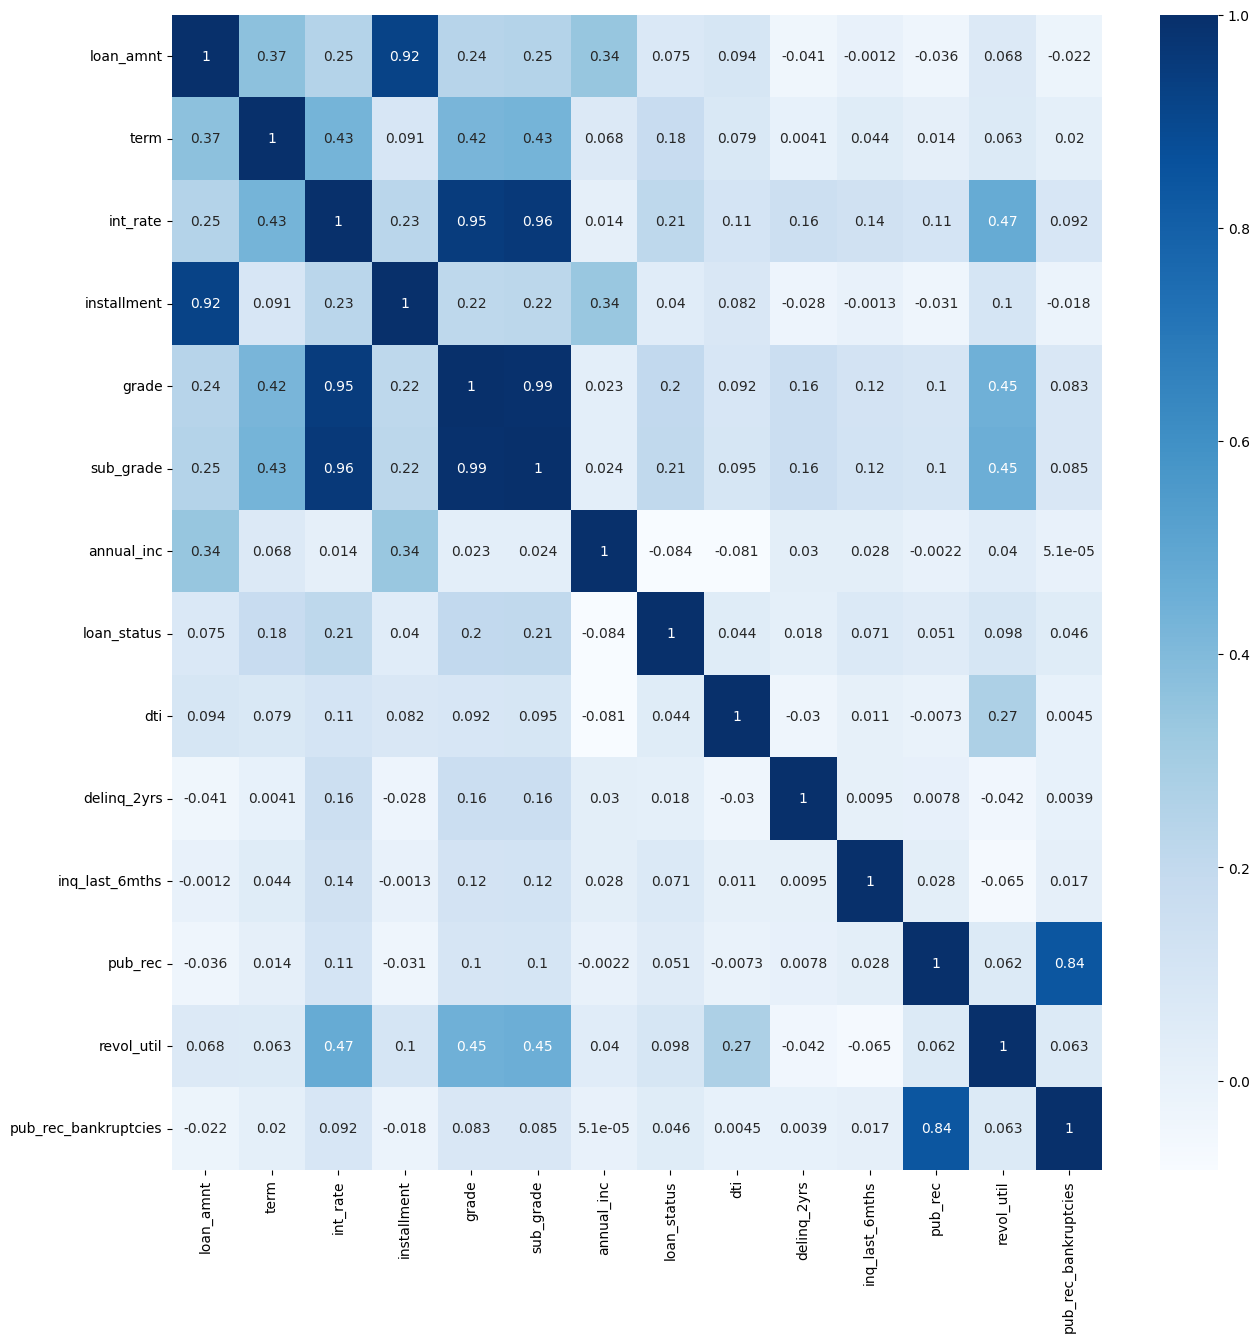

In [ ]:
# correlation check
d = data.drop(columns=["home_ownership", "verification_status", "purpose", "addr_state"])
plt.figure(figsize=(15, 15))
sns.heatmap(d.corr(), annot=True, cmap="Blues")
plt.show()

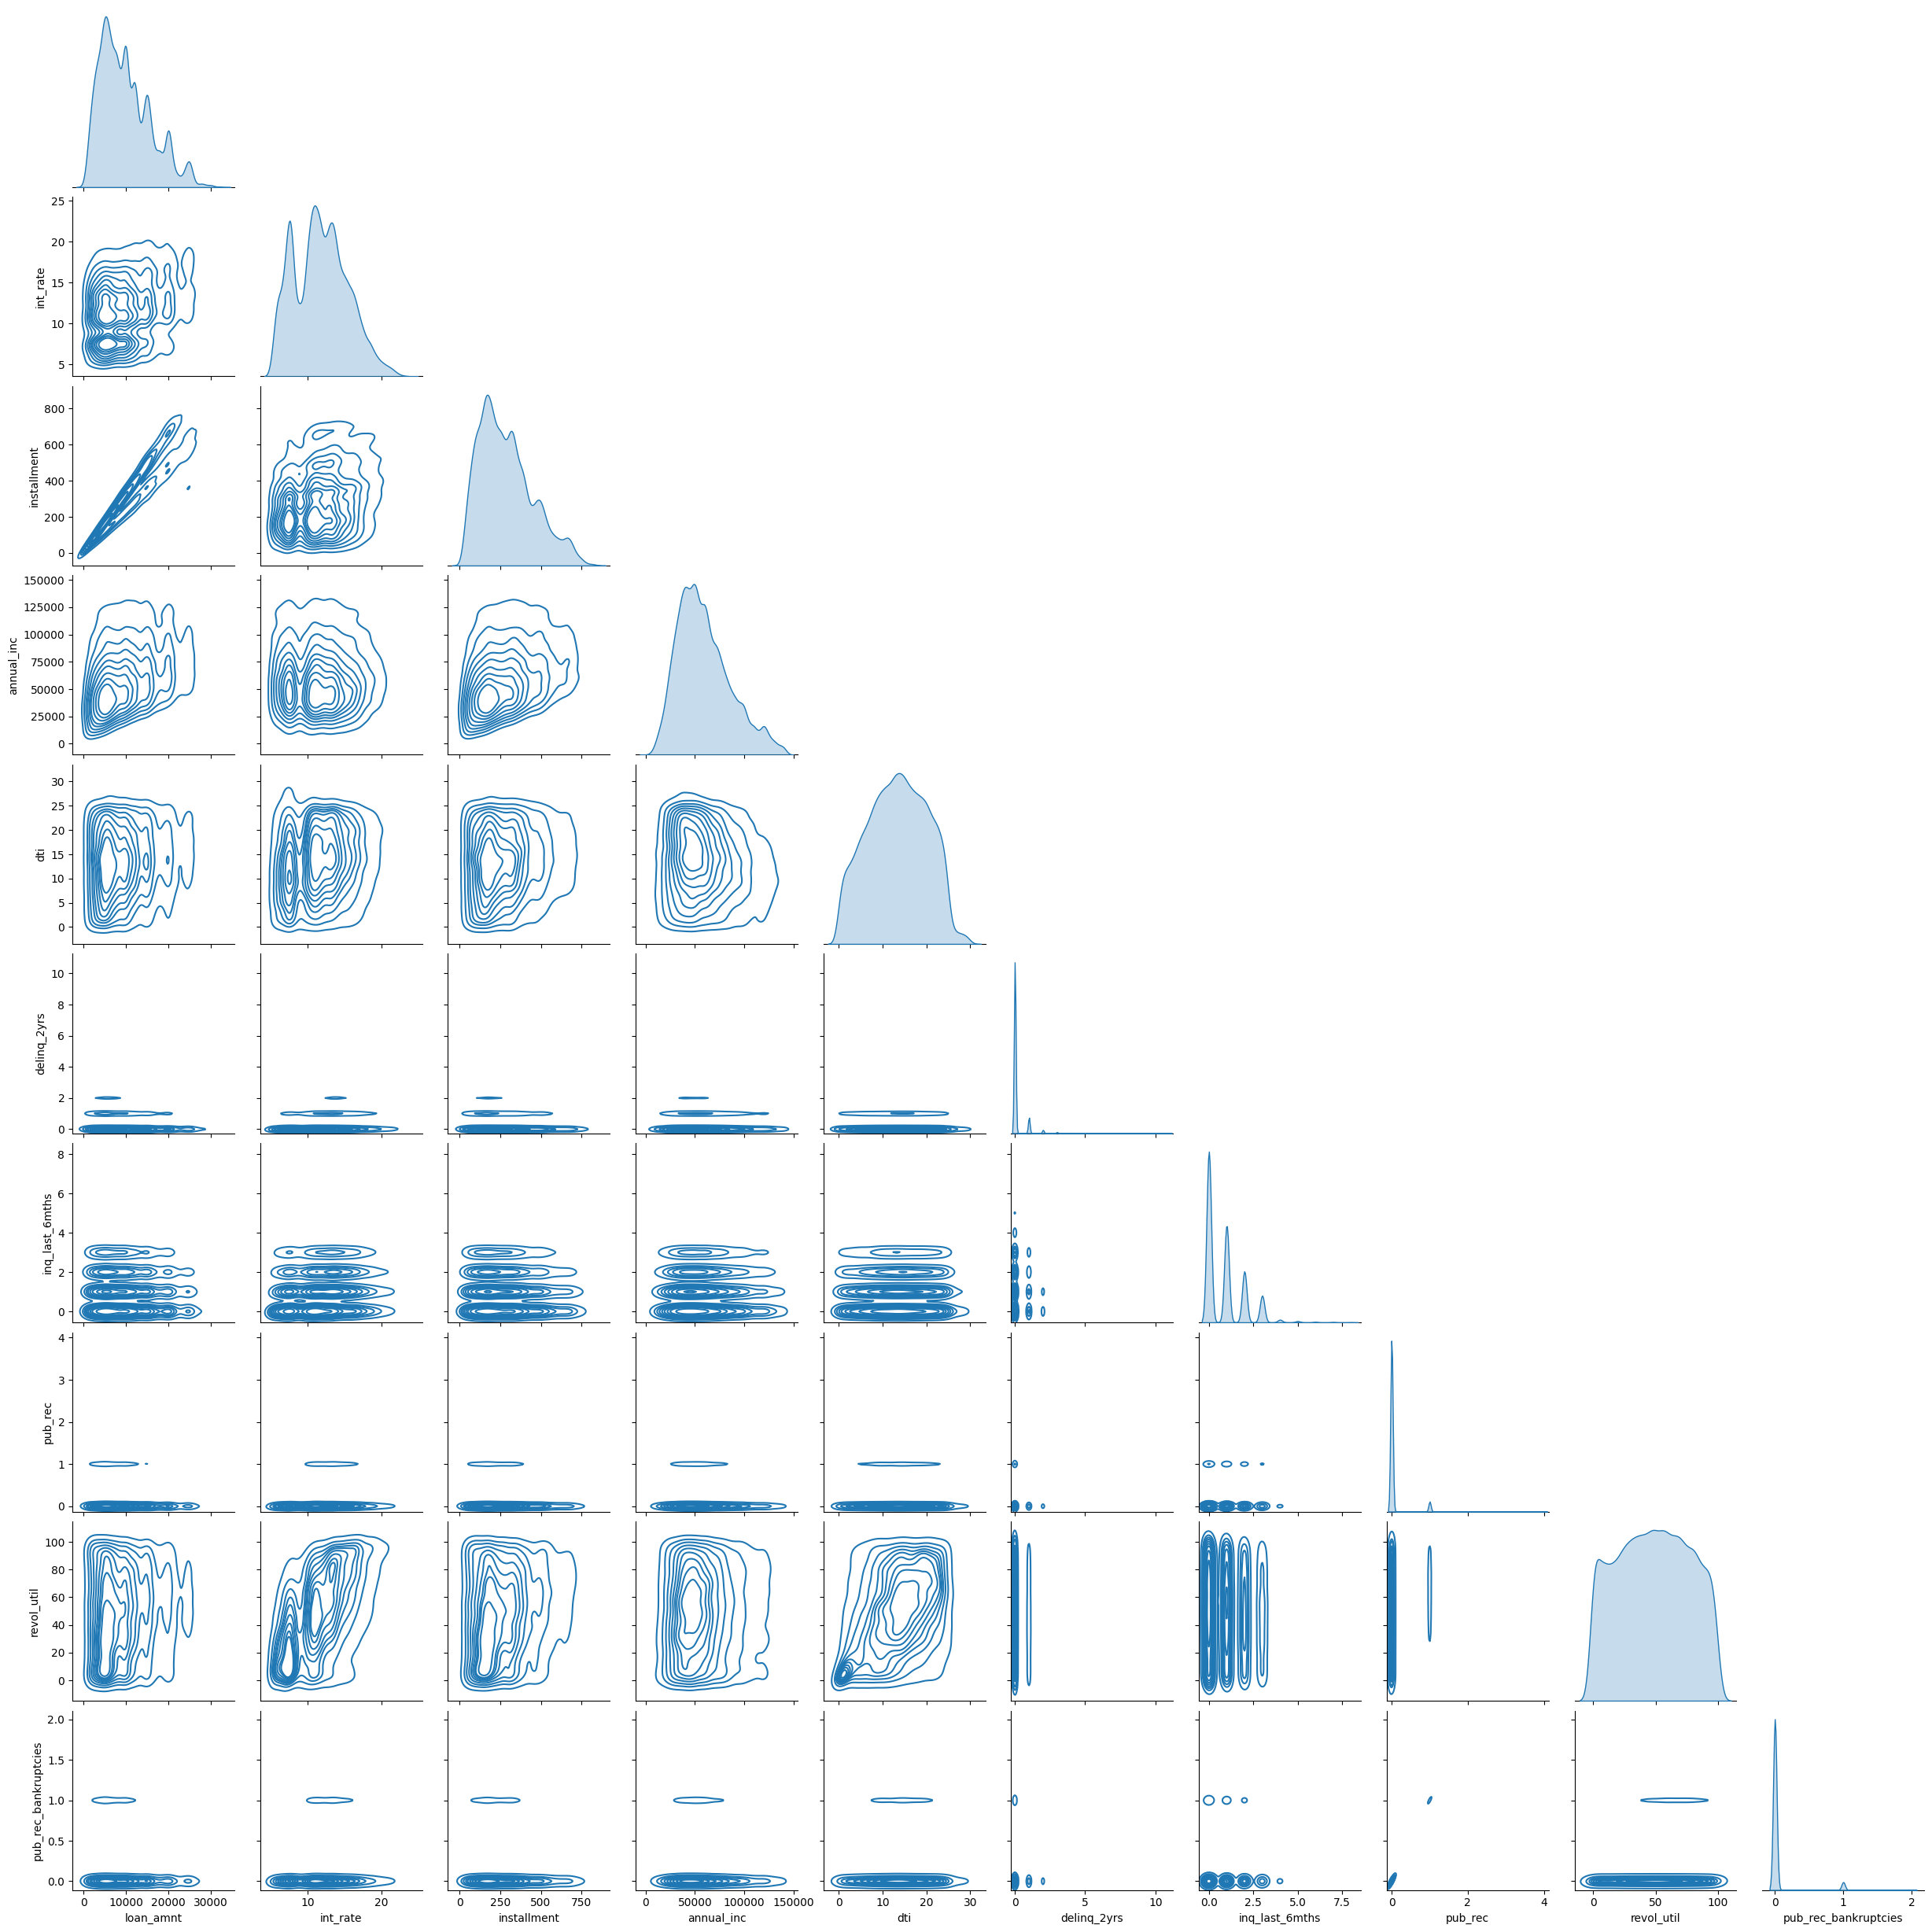

In [ ]:
# distribution of loan amount based on term and loan status

sns.pairplot(data, corner=True, kind="kde")